## Kütüphaneleri Yükleme

In [1]:
import warnings
import random
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
warnings.filterwarnings("ignore")

## Veriye İlk Bakış

In [3]:
df = pd.read_csv("C:/Users/musta/Desktop/orneklem_60000.csv")
pd.set_option('display.max_columns', None)

df.head(100)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7145625,Source1,1,2020-03-30 17:09:22,2020-03-30 17:54:22,40.666970,-111.888310,40.68702,-111.88828,1.385,At E 3900 S - Accident.,S State St,Salt Lake City,Salt Lake,UT,84107-4844,US,US/Mountain,KU42,2020-03-30 16:54:00,57.0,57.0,34.0,25.78,10.0,NNW,8.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-7253631,Source1,3,2020-02-07 08:48:53,2020-02-07 09:18:38,39.780240,-104.990500,39.78024,-104.99050,0.000,At I-25/US-87/Valley Hwy/Exit 274 - Accident.,I-70 E,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-02-07 08:45:00,25.0,16.0,93.0,24.23,1.0,S,8.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2811265,Source2,3,2018-05-08 05:52:33,2018-05-08 06:22:10,34.350273,-118.542023,NaN,NaN,0.000,Accident on I-5 Northbound before Gavin Canyon.,I-5 N,Newhall,Los Angeles,CA,91321,US,US/Pacific,K3A6,2018-05-08 05:51:00,58.0,58.0,67.0,29.10,10.0,CALM,0.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
3,A-519346,Source2,1,2022-09-01 18:04:40,2022-09-01 18:33:43,28.240549,-82.320313,NaN,NaN,0.000,Lane blocked due to crash on FL-54 at Vandine Rd.,State Road 54,Wesley Chapel,Pasco,FL,33543,US,US/Eastern,KZPH,2022-09-01 17:55:00,81.0,81.0,84.0,29.81,10.0,NE,5.0,0.07,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-514075,Source2,1,2022-09-07 08:46:42,2022-09-07 09:31:46,42.348560,-71.069321,NaN,NaN,0.000,Crash on Melrose St at Arlington St.,Arlington St,Boston,Suffolk,MA,02116-5308,US,US/Eastern,KBOS,2022-09-07 08:54:00,65.0,65.0,84.0,30.05,10.0,NNE,12.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A-554064,Source2,4,2022-07-27 13:47:52,2022-07-27 14:32:05,33.645645,-84.447769,NaN,NaN,0.000,Left hand shoulder blocked and left lane block...,GA-403 N,Atlanta,Fulton,GA,30337,US,US/Eastern,KATL,2022-07-27 13:52:00,91.0,91.0,48.0,29.04,10.0,SW,13.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
96,A-928874,Source2,3,2021-08-23 17:31:21,2021-08-23 19:16:10,34.914188,-82.107170,NaN,NaN,0.000,Accident on I-85 Southbound at Exit 63 SC-290 ...,I-85 S,Duncan,Spartanburg,SC,29334,US,US/Eastern,KGSP,2021-08-23 17:53:00,90.0,90.0,39.0,28.95,10.0,ENE,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
97,A-732217,Source2,3,2022-01-27 16:24:10,2022-01-27 16:52:19,36.845570,-76.251884,NaN,NaN,0.000,Right lane closed due to accident on I-264 Wes...,I-264,Norfolk,Norfolk (City),VA,23504,US,US/Eastern,KORF,2022-01-27 15:59:00,46.0,42.0,35.0,30.31,10.0,NE,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
98,A-1956359,Source2,3,2019-07-08 18:51:06,2019-07-08 19:36:29,32.852917,-96.562721,NaN,NaN,0.000,Lane blocked due to accident on I-30 Eastbound...,E Interstate 30,Garland,Dallas,TX,75043,US,US/Central,KHQZ,2019-07-08 18:50:00,88.0,88.0,55.0,29.41,10.0,SSW,8.0,0.00,Mostly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df_turkce = df.rename(columns={
    'ID': 'ID',
    'Source': 'Kaynak',
    'Severity': 'Şiddet',
    'Start_Time': 'Başlangıç_Zamanı',
    'End_Time': 'Bitiş_Zamanı',
    'Start_Lat': 'Başlangıç_Enlem',
    'Start_Lng': 'Başlangıç_Boylam',
    'End_Lat': 'Bitiş_Enlem',
    'End_Lng': 'Bitiş_Boylam',
    'Distance(mi)': 'Kaza_Uzunluğu',
    'Description': 'Açıklama',
    'Street': 'Cadde',
    'City': 'Şehir',
    'County': 'İlçe',
    'State': 'Eyalet',
    'Zipcode': 'Posta_Kodu',
    'Country': 'Ülke',
    'Timezone': 'Zaman_Dilimi',
    'Airport_Code': 'Havalimanı_Kodu',
    'Weather_Timestamp': 'Hava_Durumu_Zamanı',
    'Temperature(F)': 'Sıcaklık(F)',
    'Wind_Chill(F)': 'Hissedilen_Sıcaklık(F)',
    'Humidity(%)': 'Nem(%)',
    'Pressure(in)': 'Basınç(in)',
    'Visibility(mi)': 'Görüş_Mesafesi(mil)',
    'Wind_Direction': 'Rüzgar_Yönü',
    'Wind_Speed(mph)': 'Rüzgar_Hızı(mph)',
    'Precipitation(in)': 'Yağış(in)',
    'Weather_Condition': 'Hava_Durumu',
    'Amenity': 'Donatı',
    'Bump': 'Tümsek',
    'Crossing': 'Yaya_Geçidi',
    'Give_Way': 'Yol_Ver',
    'Junction': 'Kavşak',
    'No_Exit': 'Çıkış_Yok',
    'Railway': 'Demiryolu',
    'Roundabout': 'Dönel_Kavşak',
    'Station': 'İstasyon',
    'Stop': 'Durak',
    'Traffic_Calming': 'Trafik_Yatıştırma',
    'Traffic_Signal': 'Trafik_Işığı',
    'Turning_Loop': 'Dönüş_Halkası',
    'Sunrise_Sunset': 'Gün_Doğumu_Batımı',
    'Civil_Twilight': 'Sivil_Alacakaranlık',
    'Nautical_Twilight': 'Denizcilik_Alacakaranlığı',
    'Astronomical_Twilight': 'Astronomik_Alacakaranlık'
})
df_turkce

,ID,Kaynak,Şiddet,Başlangıç_Zamanı,Bitiş_Zamanı,Başlangıç_Enlem,Başlangıç_Boylam,Bitiş_Enlem,Bitiş_Boylam,Kaza_Uzunluğu,Açıklama,Cadde,Şehir,İlçe,Eyalet,Posta_Kodu,Ülke,Zaman_Dilimi,Havalimanı_Kodu,Hava_Durumu_Zamanı,Sıcaklık(F),Hissedilen_Sıcaklık(F),Nem(%),Basınç(in),Görüş_Mesafesi(mil),Rüzgar_Yönü,Rüzgar_Hızı(mph),Yağış(in),Hava_Durumu,Donatı,Tümsek,Yaya_Geçidi,Yol_Ver,Kavşak,Çıkış_Yok,Demiryolu,Dönel_Kavşak,İstasyon,Durak,Trafik_Yatıştırma,Trafik_Işığı,Dönüş_Halkası,Gün_Doğumu_Batımı,Sivil_Alacakaranlık,Denizcilik_Alacakaranlığı,Astronomik_Alacakaranlık
0,A-7145625,Source1,1,2020-03-30 17:09:22,2020-03-30 17:54:22,40.666970,-111.888310,40.687020,-111.888280,1.385,At E 3900 S - Accident.,S State St,Salt Lake City,Salt Lake,UT,84107-4844,US,US/Mountain,KU42,2020-03-30 16:54:00,57.0,57.0,34.0,25.78,10.0,NNW,8.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-7253631,Source1,3,2020-02-07 08:48:53,2020-02-07 09:18:38,39.780240,-104.990500,39.780240,-104.990500,0.000,At I-25/US-87/Valley Hwy/Exit 274 - Accident.,I-70 E,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-02-07 08:45:00,25.0,16.0,93.0,24.23,1.0,S,8.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-2811265,Source2,3,2018-05-08 05:52:33,2018-05-08 06:22:10,34.350273,-118.542023,NaN,NaN,0.000,Accident on I-5 Northbound before Gavin Canyon.,I-5 N,Newhall,Los Angeles,CA,91321,US,US/Pacific,K3A6,2018-05-08 05:51:00,58.0,58.0,67.0,29.10,10.0,CALM,0.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
3,A-519346,Source2,1,2022-09-01 18:04:40,2022-09-01 18:33:43,28.240549,-82.320313,NaN,NaN,0.000,Lane blocked due to crash on FL-54 at Vandine Rd.,State Road 54,Wesley Chapel,Pasco,FL,33543,US,US/Eastern,KZPH,2022-09-01 17:55:00,81.0,81.0,84.0,29.81,10.0,NE,5.0,0.07,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-514075,Source2,1,2022-09-07 08:46:42,2022-09-07 09:31:46,42.348560,-71.069321,NaN,NaN,0.000,Crash on Melrose St at Arlington St.,Arlington St,Boston,Suffolk,MA,02116-5308,US,US/Eastern,KBOS,2022-09-07 08:54:00,65.0,65.0,84.0,30.05,10.0,NNE,12.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,A-7190135,Source1,4,2020-04-22 09:41:59,2020-04-22 09:56:59,42.335000,-71.075060,42.335000,-71.075060,0.000,Closed at Monsignor Reynolds Way/Malden St - R...,Harrison Ave,Boston,Suffolk,MA,02118-4080,US,US/Eastern,KBOS,2020-04-22 09:54:00,38.0,28.0,38.0,29.66,10.0,W,18.0,0.00,Partly Cloudy,False,False,True,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
59996,A-1375670,Source2,3,2020-09-05 11:16:33,2020-09-05 13:27:08,32.806694,-117.215927,NaN,NaN,0.000,Lane blocked due to accident on I-5 Southbound...,Garnet Ave,San Diego,San Diego,CA,92117,US,US/Pacific,KMYF,2020-09-05 10:53:00,98.0,98.0,31.0,29.46,10.0,NW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
59997,A-7185545,Source1,1,2020-04-19 02:36:41,2020-04-19 02:51:41,38.385500,-122.716310,38.385500,-122.716310,0.000,At Santa Rosa Ave - Accident. Hard shoulder bl...,Redwood Hwy S,Santa Rosa,Sonoma,CA,95407,US,US/Pacific,KSTS,2020-04-19 02:53:00,47.0,47.0,93.0,29.91,9.0,CALM,0.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
59998,A-648109,Source2,2,2022-04-16 06:54:07,2022-04-16 07:38:52,37.348045,-122.059761,NaN,NaN,0.000,Two lanes blocked due to crash on CA-85 Northb...,CA-85 N,Sunnyvale,Santa Clara,CA,94087,US,US/Pacific,KNUQ,2022-04-16 06:55:00,55.0,55.0,88.0,29.84,3.0,C

In [6]:
for sutun in df_turkce.columns:
    print(f"🔸 {sutun} sütunundaki eşsiz değerler ve frekansları:")
    print(df_turkce[sutun].value_counts(dropna=False))
    print("-" * 50)

🔸 ID sütunundaki eşsiz değerler ve frekansları:
ID
A-625241     1
A-7054931    1
A-6344154    1
A-6959675    1
A-631747     1
            ..
A-514075     1
A-519346     1
A-2811265    1
A-7253631    1
A-7145625    1
Name: count, Length: 60000, dtype: int64
--------------------------------------------------
🔸 Kaynak sütunundaki eşsiz değerler ve frekansları:
Kaynak
Source1    33009
Source2    25450
Source3     1541
Name: count, dtype: int64
--------------------------------------------------
🔸 Şiddet sütunundaki eşsiz değerler ve frekansları:
Şiddet
1    15000
3    15000
4    15000
2    15000
Name: count, dtype: int64
--------------------------------------------------
🔸 Başlangıç_Zamanı sütunundaki eşsiz değerler ve frekansları:
Başlangıç_Zamanı
2021-11-21 18:37:51    15
2021-05-28 07:31:48     6
2021-08-25 08:59:15     6
2022-08-02 14:36:08     6
2021-09-16 12:11:26     5
                       ..
2020-04-22 09:41:59     1
2020-09-05 11:16:33     1
2020-04-19 02:36:41     1
2022-04-16 0

In [7]:
df_turkce.describe().T

,count,mean,std,min,25%,50%,75%,max
Şiddet,60000.0,2.500000,1.118043,1.000000,1.750000,2.500000,3.250000,4.000000
Başlangıç_Enlem,60000.0,36.657827,4.911308,24.662330,33.597845,36.833228,40.409213,48.999569
Başlangıç_Boylam,60000.0,-92.092326,16.373874,-124.423677,-105.057301,-85.174419,-80.066020,-68.338821
Bitiş_Enlem,33009.0,36.908275,4.979518,24.661070,33.668210,37.544433,40.534612,48.963812
Bitiş_Boylam,33009.0,-93.083537,17.270520,-124.424872,-111.888300,-85.252287,-78.842790,-68.759328
Kaza_Uzunluğu,60000.0,0.692777,2.651274,0.000000,0.000000,0.000000,0.424000,242.339996
Sıcaklık(F),60000.0,63.334312,18.872859,-24.000000,51.000000,66.000000,77.000000,113.000000
Hissedilen_Sıcaklık(F),60000.0,62.147798,21.002843,-50.100000,51.000000,66.000000,77.000000,113.000000
Nem(%),60000.0,65.225750,23.526069,2.000000,48.000000,69.000000,85.000000,100.000000
Basınç(in),60000.0,29.252072,1.212504,19.640000,29.100000,29.580000,29.920000,30.970000


## Eksik Veri Analizi

In [8]:
print(df_turkce.isnull().sum())  
print("---------------------------------------------------")
print(df_turkce.isnull().mean() * 100)  

ID                               0
Kaynak                           0
Şiddet                           0
Başlangıç_Zamanı                 0
Bitiş_Zamanı                     0
Başlangıç_Enlem                  0
Başlangıç_Boylam                 0
Bitiş_Enlem                  26991
Bitiş_Boylam                 26991
Kaza_Uzunluğu                    0
Açıklama                         0
Cadde                            0
Şehir                            0
İlçe                             0
Eyalet                           0
Posta_Kodu                       0
Ülke                             0
Zaman_Dilimi                     0
Havalimanı_Kodu                  0
Hava_Durumu_Zamanı               0
Sıcaklık(F)                      0
Hissedilen_Sıcaklık(F)           0
Nem(%)                           0
Basınç(in)                       0
Görüş_Mesafesi(mil)              0
Rüzgar_Yönü                      0
Rüzgar_Hızı(mph)                 0
Yağış(in)                        0
Hava_Durumu         

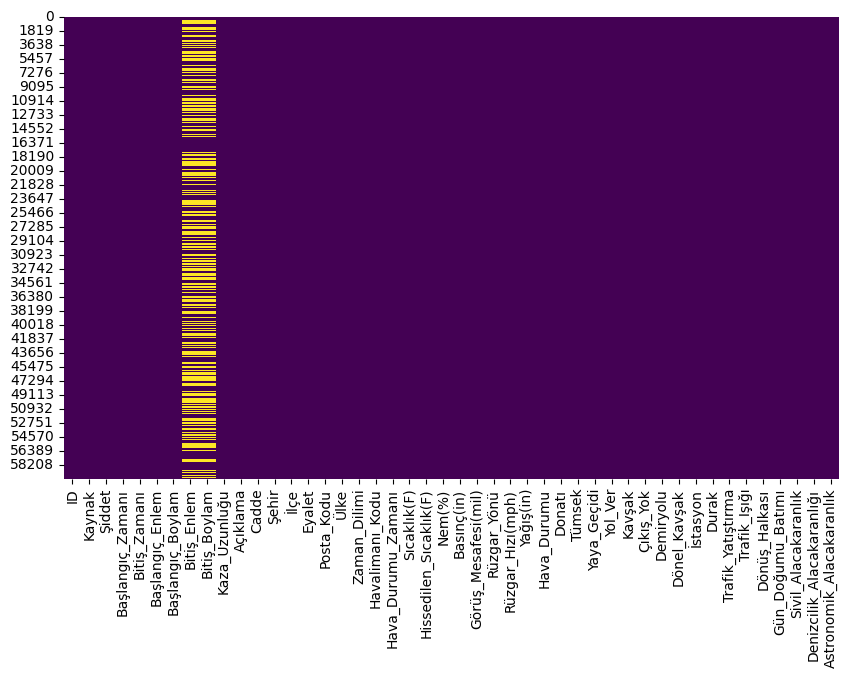

In [9]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

In [10]:
# Bu iki sütundaki verilerin yarıya yakın bir kısmı eksik olduğu ve çok önemli olmadıkları için çıkarıyoruz.
df_turkce.drop(['Bitiş_Enlem',
                'Bitiş_Boylam'], axis=1, inplace=True)

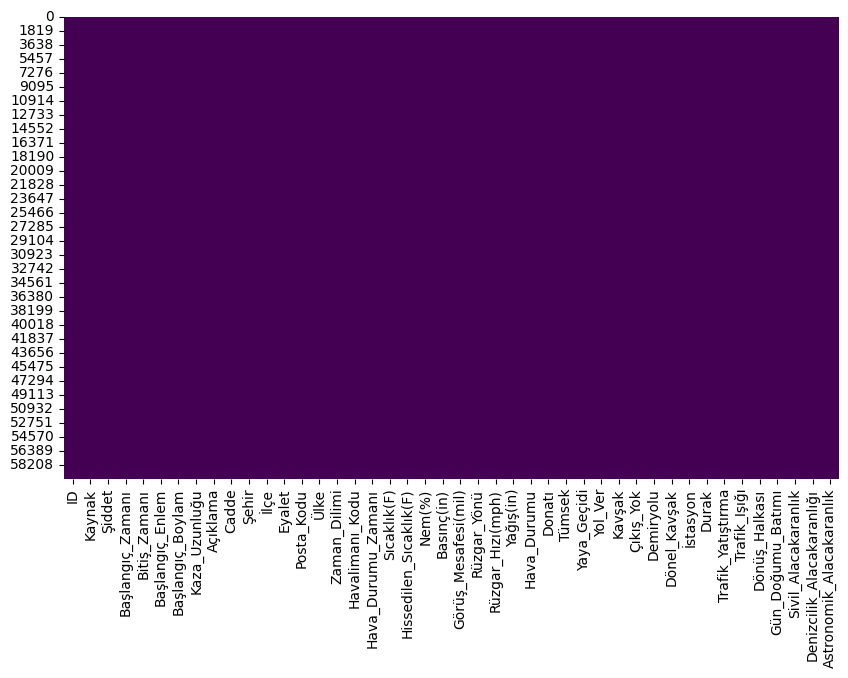

In [11]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df_turkce.isnull(), cbar=False, cmap='viridis') 
plt.show()

## Aykırı Veri Analizi

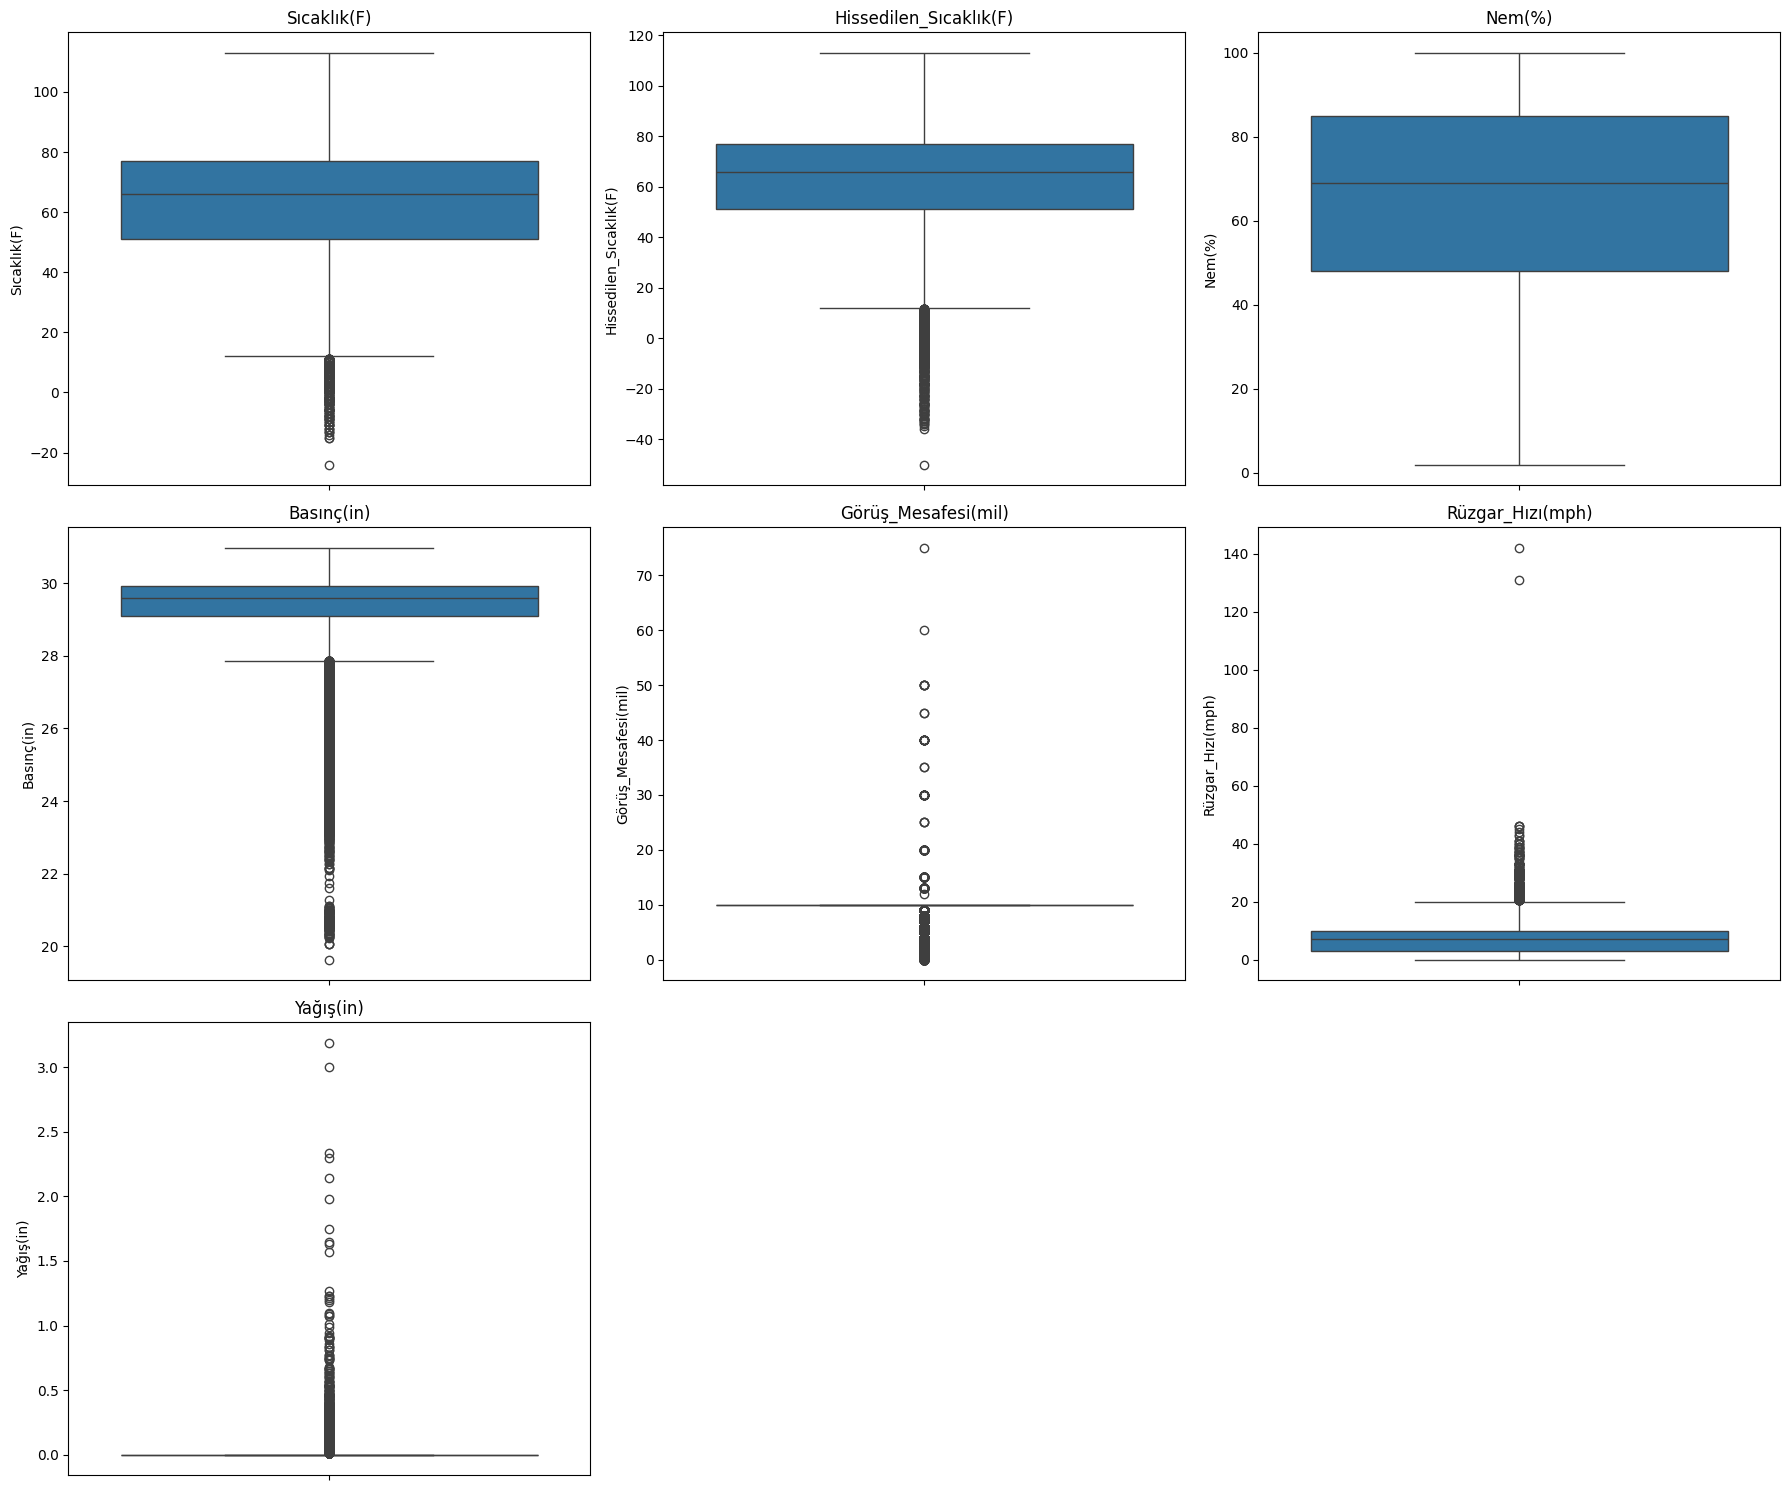

In [12]:
Sayisal_Sutunlar = ["Sıcaklık(F)", "Hissedilen_Sıcaklık(F)", "Nem(%)", 
                    "Basınç(in)", "Görüş_Mesafesi(mil)", "Rüzgar_Hızı(mph)", "Yağış(in)"]

plt.figure(figsize=(18, 15))  
satir_sayisi = (len(Sayisal_Sutunlar) + 2) // 3  

for i, sutun in enumerate(Sayisal_Sutunlar, 1):
    plt.subplot(satir_sayisi, 3, i)
    sns.boxplot(y=df_turkce[sutun])
    plt.title(sutun)

plt.tight_layout()
plt.show()

## Özellik Çıkarımı ve Seçimi

In [13]:
random.seed(42)
np.random.seed(42)

#### Başlangıç Zamananını Ayrıklaştırma

In [14]:
df_turkce['Başlangıç_Zamanı'] = pd.to_datetime(df_turkce['Başlangıç_Zamanı'], errors='coerce')
df_turkce = df_turkce.dropna(subset=['Başlangıç_Zamanı'])  

saatler = df_turkce['Başlangıç_Zamanı'].dt.hour + df_turkce['Başlangıç_Zamanı'].dt.minute / 60

X = saatler.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5, random_state=42)
df_turkce['Zaman_Kümesi'] = kmeans.fit_predict(X)

print("Zaman Küme Aralıkları:")
for küme in sorted(df_turkce['Zaman_Kümesi'].unique()):
    küme_saatleri = saatler[df_turkce['Zaman_Kümesi'] == küme]
    min_saat = küme_saatleri.min()
    max_saat = küme_saatleri.max()
    print(f"Küme {küme}: {int(min_saat):02d}:{int((min_saat%1)*60):02d} - {int(max_saat):02d}:{int((max_saat%1)*60):02d}")

Zaman Küme Aralıkları:
Küme 0: 00:00 - 05:33
Küme 1: 14:48 - 19:00
Küme 2: 05:34 - 10:16
Küme 3: 10:18 - 14:46
Küme 4: 19:00 - 23:59


#### Başlangıç ve Bitiş Zamanı Değerlerinden Kaza Etki Süresi Özelliğini Çıkarma

In [15]:
df_turkce['Başlangıç_Zamanı'] = pd.to_datetime(df_turkce['Başlangıç_Zamanı'])
df_turkce['Bitiş_Zamanı'] = pd.to_datetime(df_turkce['Bitiş_Zamanı'])

df_turkce['Kaza_Etki_Süresi'] = (df_turkce['Bitiş_Zamanı'] - df_turkce['Başlangıç_Zamanı']).dt.total_seconds() / 3600

#### Başlangıç Enlem ve Boylam Değerlerini Ayrıklaştırma

In [16]:
koordinatlar = df_turkce[['Başlangıç_Enlem', 'Başlangıç_Boylam']].dropna()

X_koord = koordinatlar.values

kmeans = KMeans(n_clusters=5, random_state=42)
df_turkce.loc[koordinatlar.index, 'Konum_Kümesi'] = kmeans.fit_predict(X_koord)

print("📌 Konum Küme Aralıkları:\n")
for i in range(5):
    cluster = df_turkce[df_turkce['Konum_Kümesi'] == i]
    enlem_min = cluster['Başlangıç_Enlem'].min()
    enlem_max = cluster['Başlangıç_Enlem'].max()
    boylam_min = cluster['Başlangıç_Boylam'].min()
    boylam_max = cluster['Başlangıç_Boylam'].max()
    print(f"Küme {i}: Enlem {enlem_min:.6f} - {enlem_max:.6f}, Boylam {boylam_min:.6f} - {boylam_max:.6f}")

📌 Konum Küme Aralıkları:

Küme 0: Enlem 33.696823 - 47.860889, Boylam -98.734159 - -81.664290
Küme 1: Enlem 32.077637 - 48.999569, Boylam -124.423677 - -106.308142
Küme 2: Enlem 34.419226 - 45.946568, Boylam -81.914062 - -68.338821
Küme 3: Enlem 25.895210 - 47.116038, Boylam -108.305664 - -90.069748
Küme 4: Enlem 24.662330 - 37.319340, Boylam -90.407870 - -77.704315


#### Kaza Etki Süresi Özelliğini Ayrıklaştırma

In [17]:
df_turkce['Kaza_Etki_Süresi'] = pd.cut(
    df_turkce['Kaza_Etki_Süresi'],
    bins=[-float('inf'), 1, 3, 6, float('inf')],
    labels=["<1 Saat", "1 - 3 Saat", "3 - 6 Saat", "> 6 Saat"]
)

#### Düzenleme

In [18]:
sayi_yazi = {
    0: 'sıfır',
    1: 'bir',
    2: 'iki',
    3: 'üç',
    4: 'dört',
    0.0: 'sıfır',
    1.0: 'bir',
    2.0: 'iki',
    3.0: 'üç',
    4.0: 'dört'
}
siddet_yazi = {
    1: 'Hafif',
    2: 'Orta',
    3: 'Ağır',
    4: 'Çok Ağır'
  
}

df_turkce['Zaman_Kümesi'] = df_turkce['Zaman_Kümesi'].map(sayi_yazi)
df_turkce['Konum_Kümesi'] = df_turkce['Konum_Kümesi'].map(sayi_yazi)
df_turkce['Şiddet'] = df_turkce['Şiddet'].map(siddet_yazi)

#### Kaza Uzunluğu Sütununu Ayrıklaştırma

In [19]:
df_turkce['Kaza_Uzunluğu'] = df_turkce['Kaza_Uzunluğu'].apply(
    lambda x: "<10 metre" if x < 0.0063 else ">10 metre"
)

#### Eyaletlerden Nufüs ve GSYH Özelliklerini Ekleme

In [20]:
eyaletler = {
    'CA': {'GSYH': 1936, 'nüfus': 39.5},  
    'FL': {'GSYH': 754, 'nüfus': 21.5},  
    'VA': {'GSYH': 427, 'nüfus': 8.5},    
    'TX': {'GSYH': 1207, 'nüfus': 29.0}, 
    'NC': {'GSYH': 407, 'nüfus': 10.5},   
    'SC': {'GSYH': 164, 'nüfus': 5.1},  
    'PA': {'GSYH': 585, 'nüfus': 12.8},   
    'NY': {'GSYH': 1156, 'nüfus': 19.5},   
    'AZ': {'GSYH': 260, 'nüfus': 7.2},    
    'GA': {'GSYH': 404, 'nüfus': 10.6},   
    'IL': {'GSYH': 644, 'nüfus': 12.6},   
    'TN': {'GSYH': 250, 'nüfus': 6.8},    
    'MI': {'GSYH': 372, 'nüfus': 10.0},    
    'OR': {'GSYH': 168, 'nüfus': 4.2},    
    'CO': {'GSYH': 259, 'nüfus': 5.7},    
    'LA': {'GSYH': 213, 'nüfus': 4.6},    
    'OH': {'GSYH': 483, 'nüfus': 11.6},    
    'MD': {'GSYH': 300, 'nüfus': 6.0},   
    'NJ': {'GSYH': 497, 'nüfus': 8.8},    
    'WA': {'GSYH': 351, 'nüfus': 7.6},     
    'MN': {'GSYH': 267, 'nüfus': 5.6},     
    'AL': {'GSYH': 174, 'nüfus': 4.9},     
    'MA': {'GSYH': 377, 'nüfus': 6.9},     
    'IN': {'GSYH': 267, 'nüfus': 6.7},    
    'MO': {'GSYH': 246, 'nüfus': 6.1},    
    'CT': {'GSYH': 233, 'nüfus': 3.5},   
    'UT': {'GSYH': 117, 'nüfus': 3.2},    
    'OK': {'GSYH': 160, 'nüfus': 4.0},     
    'WI': {'GSYH': 251, 'nüfus': 5.8},    
    'AR': {'GSYH': 105, 'nüfus': 3.0},    
    'KY': {'GSYH': 161, 'nüfus': 4.5},   
    'IA': {'GSYH': 147, 'nüfus': 3.1},     
    'DE': {'GSYH': 62, 'nüfus': 1.0},      
    'KS': {'GSYH': 128, 'nüfus': 3.0},     
    'RI': {'GSYH': 49, 'nüfus': 1.0},      
    'DC': {'GSYH': 351, 'nüfus': 7.6},      
    'NV': {'GSYH': 127, 'nüfus': 3.1},   
    'MS': {'GSYH': 98, 'nüfus': 3.0},    
    'MT': {'GSYH': 37, 'nüfus': 1.0},     
    'NE': {'GSYH': 89, 'nüfus': 2.0},  
    'NM': {'GSYH': 75, 'nüfus': 2.1},   
    'WV': {'GSYH': 66, 'nüfus': 1.8},     
    'NH': {'GSYH': 61, 'nüfus': 1.3},       
    'ID': {'GSYH': 54, 'nüfus': 1.8},       
    'WY': {'GSYH': 38, 'nüfus': 0.6},       
    'ME': {'GSYH': 53, 'nüfus': 1.3},     
    'VT': {'GSYH': 26, 'nüfus': 0.6},       
    'SD': {'GSYH': 39, 'nüfus': 0.9},        
    'ND': {'GSYH': 33, 'nüfus': 0.7}         
}

In [21]:
nufuslar = np.array([eyaletler[ey]['nüfus'] for ey in eyaletler]).reshape(-1, 1)
gsyhler = np.array([eyaletler[ey]['GSYH'] for ey in eyaletler]).reshape(-1, 1)

def kategorik_etiketler(veri, isim):
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    etiketler = kmeans.fit_predict(veri)
    merkezler = kmeans.cluster_centers_.flatten()
    
    sirali_gruplar = np.argsort(merkezler)
    etiket_isimleri = ['Düşük', 'Orta', 'Yüksek']
    etiket_haritasi = {sirali_gruplar[i]: etiket_isimleri[i] for i in range(3)}
    etiketler_kategorik = [etiket_haritasi[e] for e in etiketler]

    araliklar = [f"{etiket_isimleri[i]}: {min(veri[etiketler==sirali_gruplar[i]])} - {max(veri[etiketler==sirali_gruplar[i]])}" for i in range(3)]
    print(f"\n{isim} aralıkları:")
    for aralik in araliklar:
        print(aralik)

    return etiketler_kategorik

nufus_kategorik = kategorik_etiketler(nufuslar, "Nüfus")
gsyh_kategorik = kategorik_etiketler(gsyhler, "GSYH")

eyalet_df = pd.DataFrame({
    'Eyalet': list(eyaletler.keys()),
    'Nüfus': nufus_kategorik,
    'GSYH': gsyh_kategorik
})

df_turkce = df_turkce.merge(eyalet_df, left_on='Eyalet', right_on='Eyalet', how='left')


Nüfus aralıkları:
Düşük: [0.6] - [5.1]
Orta: [5.6] - [12.8]
Yüksek: [19.5] - [39.5]

GSYH aralıkları:
Düşük: [26] - [300]
Orta: [351] - [754]
Yüksek: [1156] - [1936]


In [22]:
df_turkce

,ID,Kaynak,Şiddet,Başlangıç_Zamanı,Bitiş_Zamanı,Başlangıç_Enlem,Başlangıç_Boylam,Kaza_Uzunluğu,Açıklama,Cadde,Şehir,İlçe,Eyalet,Posta_Kodu,Ülke,Zaman_Dilimi,Havalimanı_Kodu,Hava_Durumu_Zamanı,Sıcaklık(F),Hissedilen_Sıcaklık(F),Nem(%),Basınç(in),Görüş_Mesafesi(mil),Rüzgar_Yönü,Rüzgar_Hızı(mph),Yağış(in),Hava_Durumu,Donatı,Tümsek,Yaya_Geçidi,Yol_Ver,Kavşak,Çıkış_Yok,Demiryolu,Dönel_Kavşak,İstasyon,Durak,Trafik_Yatıştırma,Trafik_Işığı,Dönüş_Halkası,Gün_Doğumu_Batımı,Sivil_Alacakaranlık,Denizcilik_Alacakaranlığı,Astronomik_Alacakaranlık,Zaman_Kümesi,Kaza_Etki_Süresi,Konum_Kümesi,Nüfus,GSYH
0,A-7145625,Source1,Hafif,2020-03-30 17:09:22,2020-03-30 17:54:22,40.666970,-111.888310,>10 metre,At E 3900 S - Accident.,S State St,Salt Lake City,Salt Lake,UT,84107-4844,US,US/Mountain,KU42,2020-03-30 16:54:00,57.0,57.0,34.0,25.78,10.0,NNW,8.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,bir,<1 Saat,bir,Düşük,Düşük
1,A-7253631,Source1,Ağır,2020-02-07 08:48:53,2020-02-07 09:18:38,39.780240,-104.990500,<10 metre,At I-25/US-87/Valley Hwy/Exit 274 - Accident.,I-70 E,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-02-07 08:45:00,25.0,16.0,93.0,24.23,1.0,S,8.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,iki,<1 Saat,üç,Orta,Düşük
2,A-2811265,Source2,Ağır,2018-05-08 05:52:33,2018-05-08 06:22:10,34.350273,-118.542023,<10 metre,Accident on I-5 Northbound before Gavin Canyon.,I-5 N,Newhall,Los Angeles,CA,91321,US,US/Pacific,K3A6,2018-05-08 05:51:00,58.0,58.0,67.0,29.10,10.0,CALM,0.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,iki,<1 Saat,bir,Yüksek,Yüksek
3,A-519346,Source2,Hafif,2022-09-01 18:04:40,2022-09-01 18:33:43,28.240549,-82.320313,<10 metre,Lane blocked due to crash on FL-54 at Vandine Rd.,State Road 54,Wesley Chapel,Pasco,FL,33543,US,US/Eastern,KZPH,2022-09-01 17:55:00,81.0,81.0,84.0,29.81,10.0,NE,5.0,0.07,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,bir,<1 Saat,dört,Yüksek,Orta
4,A-514075,Source2,Hafif,2022-09-07 08:46:42,2022-09-07 09:31:46,42.348560,-71.069321,<10 metre,Crash on Melrose St at Arlington St.,Arlington St,Boston,Suffolk,MA,02116-5308,US,US/Eastern,KBOS,2022-09-07 08:54:00,65.0,65.0,84.0,30.05,10.0,NNE,12.0,0.00,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day,iki,<1 Saat,iki,Orta,Orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55652,A-7190135,Source1,Çok Ağır,2020-04-22 09:41:59,2020-04-22 09:56:59,42.335000,-71.075060,<10 metre,Closed at Monsignor Reynolds Way/Malden St - R...,Harrison Ave,Boston,Suffolk,MA,02118-4080,US,US/Eastern,KBOS,2020-04-22 09:54:00,38.0,28.0,38.0,29.66,10.0,W,18.0,0.00,Partly Cloudy,False,False,True,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day,iki,<1 Saat,iki,Orta,Orta
55653,A-1375670,Source2,Ağır,2020-09-05 11:16:33,2020-09-05 13:27:08,32.806694,-117.215927,<10 metre,Lane blocked due to accident on I-5 Southbound...,Garnet Ave,San Diego,San Diego,CA,92117,US,US/Pacific,KMYF,2020-09-05 10:53:00,98.0,98.0,31.0,29.46,10.0,NW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,üç,1 - 3 Saat,bir,Yüksek,Yüksek
55654,A-7185545,Source1,Hafif,2020-04-19 02:36:41,2020-04-19 02:51:41,38.385500,-122.716310,<10 metre,At Santa Rosa Ave - Accident. Hard shoulder bl...,Redwood Hwy S,Santa Rosa,Sonoma,CA,95407,US,US/Pacific,KSTS,2020-04-19 02:53:00,47.0,47.0,93.0,29.91,9.0,CALM,0.0,0.00,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,sıfır,<1 Saat,bir,Yüksek,Yüksek
55655,A-648109,Source2,Orta,2022-04-16 0

#### Özellik Silme

In [23]:
df_turkce.drop(['ID',
                'Başlangıç_Zamanı', 
                "Bitiş_Zamanı",
                "Başlangıç_Enlem",
                'Başlangıç_Boylam',  
                'Posta_Kodu',
                'Ülke',
                'Dönüş_Halkası',
                'Trafik_Yatıştırma',
                'Dönel_Kavşak',
                'Tümsek',
                'Hava_Durumu_Zamanı',
                'Açıklama',
                'Cadde', 
                "Şehir",
                "Eyalet",
                'İlçe',
                'Havalimanı_Kodu'], axis=1, inplace=True)

#### Düzenleme İşlemleri

In [24]:
df_turkce["Hava_Durumu"].unique()

array(['Mostly Cloudy', 'Light Snow', 'Partly Cloudy',
       'Partly Cloudy / Windy', 'Cloudy', 'Fair', 'Haze', 'Light Rain',
       'Cloudy / Windy', 'Light Drizzle', 'Rain', 'Snow', 'Overcast',
       'Fog', 'Wintry Mix', 'Freezing Rain', 'Heavy Rain',
       'Heavy T-Storm', 'Thunder', 'Thunder in the Vicinity',
       'Light Freezing Rain', 'Heavy Thunderstorms and Rain',
       'Mostly Cloudy / Windy', 'Fair / Windy', 'Heavy Snow',
       'Rain / Windy', 'Smoke', 'Light Snow / Windy',
       'Light Rain with Thunder', 'T-Storm', 'Scattered Clouds',
       'N/A Precipitation', 'Heavy Rain / Windy', 'Haze / Windy',
       'Patches of Fog', 'Showers in the Vicinity', 'Light Rain / Windy',
       'Heavy T-Storm / Windy', 'Shallow Fog', 'T-Storm / Windy',
       'Drizzle', 'Thunder / Windy', 'Light Freezing Drizzle',
       'Snow and Sleet / Windy', 'Heavy Snow / Windy', 'Heavy Drizzle',
       'Smoke / Windy', 'Squalls / Windy', 'Mist',
       'Light Thunderstorms and Rain', 'Clear',

In [25]:
def grupla_hava_durumu(durum):
    if durum in [
        'Clear', 'Fair', 'Partly Cloudy', 'Mostly Cloudy', 'Partly Cloudy / Windy', '',
        'Scattered Clouds', 'Fair / Windy'
    ]:
        return 'Açık / Parçalı Bulutlu'
    
    elif durum in [
        'Cloudy', 'Overcast', 'Haze', 'Fog', 'Mist', 'Smoke',
        'Shallow Fog', 'Patches of Fog', 'N/A Precipitation',
        'Haze / Windy', 'Fog / Windy', 'Patches of Fog / Windy', 'Smoke / Windy'
    ]:
        return 'Bulutlu / Sisli / Dumanlı'
    
    elif durum in [
        'Light Rain', 'Rain', 'Drizzle', 'Heavy Rain','Windy'
        'Showers in the Vicinity', 'Light Rain Shower',
        'Light Drizzle', 'Heavy Drizzle', 'Rain / Windy',
        'Light Rain / Windy', 'Drizzle and Fog',
        'Thunder', 'T-Storm', 'Thunder in the Vicinity',
        'Thunder / Windy', 'T-Storm / Windy', 'Light Rain with Thunder',
        'Heavy T-Storm', 'Heavy Thunderstorms and Rain',
        'Heavy T-Storm / Windy', 'Light Thunderstorms and Rain'
    ]:
        return 'Yağmur/Rüzgar'
    
    elif durum in [
        'Snow', 'Light Snow', 'Heavy Snow', 'Blowing Snow',
        'Light Snow Shower', 'Light Snow / Windy', 'Heavy Snow / Windy',
        'Snow and Sleet', 'Snow and Sleet / Windy',
        'Light Snow and Sleet', 'Light Snow and Sleet / Windy',
        'Wintry Mix', 'Wintry Mix / Windy',
        'Freezing Rain', 'Light Freezing Rain', 'Light Freezing Rain / Windy',
        'Light Freezing Drizzle', 'Light Ice Pellets', 'Ice Pellets',
        'Sleet', 'Light Sleet', 'Blowing Snow / Windy'
    ]:
        return 'Kar / Karla Karışık'
    
    else:
        return 'Ekstrem / Diğer'


df_turkce['Hava_Durumu'] = df_turkce['Hava_Durumu'].apply(grupla_hava_durumu)

In [26]:
df_turkce["Yağış(in)"].unique()

array([0.  , 0.07, 0.03, 0.05, 0.02, 0.01, 0.11, 0.15, 0.1 , 0.04, 0.12,
       0.62, 0.09, 0.06, 0.19, 0.28, 0.24, 0.08, 0.26, 0.5 , 0.13, 0.14,
       0.17, 0.53, 0.31, 0.63, 3.  , 0.22, 0.25, 0.54, 0.23, 0.16, 0.2 ,
       0.35, 0.67, 0.49, 0.41, 0.46, 0.34, 0.18, 0.94, 0.45, 0.3 , 0.37,
       0.57, 0.38, 0.47, 0.39, 0.27, 1.63, 0.4 , 0.92, 0.33, 0.21, 0.43,
       0.44, 1.09, 0.76, 0.36, 0.32, 0.89, 0.48, 1.57, 1.23, 1.98, 0.99,
       0.52, 0.29, 0.77, 2.14, 3.19, 0.55, 0.51, 1.65, 1.1 , 0.75, 0.66,
       0.42, 0.73, 0.9 , 0.83, 0.65, 0.56, 1.75, 1.2 , 1.07, 0.59, 0.81,
       0.68, 0.86, 0.6 , 1.01, 1.27, 1.21, 0.74, 0.61, 0.91, 1.18])

In [27]:
yagis_verisi = df_turkce['Yağış(in)'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['Yağış_Kümesi'] = kmeans.fit_predict(yagis_verisi)

merkezler = sorted(kmeans.cluster_centers_.flatten())
sinirlar = [(merkezler[i] + merkezler[i + 1]) / 2 for i in range(len(merkezler) - 1)]

print("Kümeler arası sınırlar (inç cinsinden):")
print(f"Az:          0 - {sinirlar[0]:.2f}")
print(f"Orta:        {sinirlar[0]:.2f} - {sinirlar[1]:.2f}")
print(f"Yüksek:      {sinirlar[1]:.2f} - {sinirlar[2]:.2f}")
print(f"Çok Yüksek:  {sinirlar[2]:.2f} - max")

def yagis_grubu(deger):
    if deger <= sinirlar[0]:
        return "Az"
    elif deger <= sinirlar[1]:
        return "Orta"
    elif deger <= sinirlar[2]:
        return "Yüksek"
    else:
        return "Çok Yüksek"

df_turkce['Yağış(in)'] = df_turkce['Yağış(in)'].apply(yagis_grubu)

df_turkce.drop(columns=['Yağış_Kümesi'], inplace=True)

Kümeler arası sınırlar (inç cinsinden):
Az:          0 - 0.08
Orta:        0.08 - 0.40
Yüksek:      0.40 - 1.37
Çok Yüksek:  1.37 - max


In [28]:
df_turkce["Rüzgar_Hızı(mph)"].unique()

array([  8. ,   0. ,   5. ,  12. ,  22. ,   9. ,  13. ,   6. ,   3. ,
         7. ,  25. ,   4.6,  10. ,  15. ,  17. ,   5.8,   6.9,  18. ,
        28.8,  14. ,  16. ,  10.4,   8.1,  20. ,  18.4,  46. ,   9.2,
        21. ,  12.7,  23. ,  24. ,  11.5,  16.1,  39. ,  28. ,  19.6,
         2. ,  20.7,  25.3,  17.3,  21.9,  33. ,  13.8,  29. ,   3.5,
        35. ,  32.2,  24.2,  30. ,  31. ,  26. , 131. ,  36. ,  37. ,
       142. ,  38. ,  32. ,  27.6,  43. ,  26.5,  33.4,  34.5,  35.7,
        31.1,  41. ,  29.9,  40. ,  44. ,  42.6,  44.9])

In [29]:
ruzgar_verisi = df_turkce['Rüzgar_Hızı(mph)'].values.reshape(-1, 1)

kmeans_ruzgar = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['Rüzgar_Kümesi'] = kmeans_ruzgar.fit_predict(ruzgar_verisi)

merkezler_ruzgar = sorted(kmeans_ruzgar.cluster_centers_.flatten())
sinirlar_ruzgar = [(merkezler_ruzgar[i] + merkezler_ruzgar[i + 1]) / 2 for i in range(len(merkezler_ruzgar) - 1)]

print("Rüzgar hızı kümeleri (mph cinsinden):")
print(f"Yok/Çok Yavaş:  0 - {sinirlar_ruzgar[0]:.2f}")
print(f"Yavaş:          {sinirlar_ruzgar[0]:.2f} - {sinirlar_ruzgar[1]:.2f}")
print(f"Orta:           {sinirlar_ruzgar[1]:.2f} - {sinirlar_ruzgar[2]:.2f}")
print(f"Hızlı:          {sinirlar_ruzgar[2]:.2f} - {sinirlar_ruzgar[3]:.2f}")
print(f"Çok Hızlı:      {sinirlar_ruzgar[3]:.2f} - max")

def ruzgar_grubu(deger):
    if deger <= sinirlar_ruzgar[0]:
        return "Yok/Çok Yavaş"
    elif deger <= sinirlar_ruzgar[1]:
        return "Yavaş"
    elif deger <= sinirlar_ruzgar[2]:
        return "Orta"
    elif deger <= sinirlar_ruzgar[3]:
        return "Hızlı"
    else:
        return "Çok Hızlı"

df_turkce['Rüzgar_Hızı(mph)'] = df_turkce['Rüzgar_Hızı(mph)'].apply(ruzgar_grubu)

df_turkce.drop(columns=['Rüzgar_Kümesi'], inplace=True)

Rüzgar hızı kümeleri (mph cinsinden):
Yok/Çok Yavaş:  0 - 2.34
Yavaş:          2.34 - 6.51
Orta:           6.51 - 11.18
Hızlı:          11.18 - 18.53
Çok Hızlı:      18.53 - max


In [30]:
df_turkce["Rüzgar_Yönü"].unique()

array(['NNW', 'S', 'CALM', 'NE', 'NNE', 'SE', 'SW', 'ESE', 'E', 'VAR',
       'SSE', 'N', 'ENE', 'W', 'WSW', 'WNW', 'NW', 'SSW', 'South',
       'North', 'East', 'West', 'Variable'], dtype=object)

In [31]:
def grupla_ruzgar_yonu(durum):
    if durum in [
        'CALM'

    ]:
        return 'Rüzgar Yok'
    
    elif durum in [ 
        'S', 'SSW', 'SSE', 'South'

    ]:
        return 'Güney'
    
    elif durum in [ 
        'W', 'WSW', 'WNW', 'West'
    ]:
        return 'Batı'
    
    elif durum in [  
        'N', 'NNW', 'NNE', 'North'
    ]:
        return 'Kuzey'

    elif durum in [  
        'E', 'ESE', 'ENE', 'East'
    ]:
        return 'Doğu'
    
    else:
        return 'Çok Yönlü'


df_turkce['Rüzgar_Yönü'] = df_turkce['Rüzgar_Yönü'].apply(grupla_ruzgar_yonu)

In [32]:
df_turkce["Görüş_Mesafesi(mil)"].unique()


array([1.0e+01, 1.0e+00, 2.0e+00, 7.0e+00, 9.0e+00, 4.0e+00, 8.0e+00,
       5.0e+00, 3.0e+00, 7.5e-01, 1.2e+00, 1.8e+00, 1.5e+01, 6.0e+00,
       5.0e-01, 2.0e+01, 1.5e+00, 2.5e-01, 2.0e-01, 8.0e-01, 1.3e+01,
       4.0e+01, 2.5e+00, 3.0e+01, 0.0e+00, 5.0e+01, 2.5e+01, 6.0e-02,
       8.8e-01, 7.5e+01, 1.2e-01, 1.0e-01, 1.9e-01, 6.3e-01, 3.8e-01,
       1.2e+01, 4.5e+01, 3.5e+01, 1.9e+00, 6.0e+01])

In [33]:
gorus_verisi = df_turkce['Görüş_Mesafesi(mil)'].values.reshape(-1, 1)

kmeans_gorus = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['Görüş_Kümesi'] = kmeans_gorus.fit_predict(gorus_verisi)

merkezler_gorus = sorted(kmeans_gorus.cluster_centers_.flatten())
sinirlar_gorus = [(merkezler_gorus[i] + merkezler_gorus[i + 1]) / 2 for i in range(len(merkezler_gorus) - 1)]

print("Görüş Mesafesi kümeleri (mil cinsinden):")
print(f"Düşük:       0 - {sinirlar_gorus[0]:.2f}")
print(f"Orta:        {sinirlar_gorus[0]:.2f} - {sinirlar_gorus[1]:.2f}")
print(f"Yüksek:      {sinirlar_gorus[1]:.2f} - {sinirlar_gorus[2]:.2f}")
print(f"Çok Yüksek:  {sinirlar_gorus[2]:.2f} - max")

def gorus_grubu(deger):
    if deger <= sinirlar_gorus[0]:
        return "Düşük"
    elif deger <= sinirlar_gorus[1]:
        return "Orta"
    elif deger <= sinirlar_gorus[2]:
        return "Yüksek"
    else:
        return "Çok Yüksek"

df_turkce['Görüş_Mesafesi(mil)'] = df_turkce['Görüş_Mesafesi(mil)'].apply(gorus_grubu)

df_turkce.drop(columns=['Görüş_Kümesi'], inplace=True)

Görüş Mesafesi kümeleri (mil cinsinden):
Düşük:       0 - 4.33
Orta:        4.33 - 8.27
Yüksek:      8.27 - 23.96
Çok Yüksek:  23.96 - max


In [34]:
df_turkce["Basınç(in)"].unique()

array([25.78, 24.23, 29.1 , 29.81, 30.05, 29.76, 29.93, 30.02, 29.95,
       29.99, 29.62, 30.01, 29.24, 29.53, 29.37, 30.15, 29.49, 29.68,
       29.89, 29.85, 30.04, 25.42, 28.59, 29.96, 30.58, 27.3 , 28.3 ,
       29.59, 29.  , 28.98, 28.07, 30.07, 29.31, 28.79, 29.88, 29.03,
       29.57, 29.84, 30.09, 28.55, 28.99, 29.44, 28.83, 30.03, 29.61,
       29.25, 28.8 , 29.02, 29.77, 29.8 , 29.21, 25.83, 29.2 , 27.15,
       28.86, 30.13, 29.92, 28.93, 30.19, 25.74, 28.57, 30.24, 28.94,
       29.27, 29.04, 28.95, 30.31, 29.41, 29.23, 29.07, 29.34, 25.82,
       29.58, 29.3 , 29.32, 28.87, 30.08, 28.77, 27.12, 29.4 , 28.56,
       29.33, 30.1 , 29.54, 29.63, 29.79, 29.08, 29.47, 29.38, 26.88,
       29.67, 29.52, 30.45, 29.82, 29.18, 30.12, 25.71, 28.85, 28.78,
       29.91, 29.14, 29.5 , 29.29, 24.48, 28.43, 28.51, 24.62, 28.88,
       27.49, 29.97, 29.94, 29.71, 29.48, 24.39, 29.72, 29.55, 29.78,
       29.7 , 29.36, 30.2 , 29.66, 29.73, 29.6 , 29.09, 30.27, 29.06,
       29.86, 29.28,

In [35]:
benzersiz_basinclar = df_turkce['Basınç(in)'].dropna().unique().reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=42)
kume_etiketleri = kmeans.fit_predict(benzersiz_basinclar)

merkezler = kmeans.cluster_centers_.flatten()
sirali_indexler = np.argsort(merkezler)

etiket_cevir = {sirali_indexler[0]: "Düşük", 
                sirali_indexler[1]: "Orta", 
                sirali_indexler[2]: "Yüksek"}

etiket_df = pd.DataFrame({
    'Basınç(in)': benzersiz_basinclar.flatten(),
    'Etiket': [etiket_cevir[etiket] for etiket in kume_etiketleri]
})

df_turkce['Basınç(in)'] = df_turkce['Basınç(in)'].map(
    dict(zip(etiket_df['Basınç(in)'], etiket_df['Etiket']))
)

print("Kümelere göre Basınç sınırları (in):")
for kume in sirali_indexler:
    kume_degerleri = benzersiz_basinclar[kume_etiketleri == kume].flatten()
    print(f"{etiket_cevir[kume]}: {kume_degerleri.min():.2f} - {kume_degerleri.max():.2f}")

Kümelere göre Basınç sınırları (in):
Düşük: 19.64 - 24.00
Orta: 24.01 - 27.32
Yüksek: 27.33 - 30.97


In [36]:
df_turkce["Nem(%)"].unique()

array([ 34.,  93.,  67.,  84., 100.,  59.,  71.,  73.,  98.,  68.,  53.,
        62.,  32.,  87.,  54.,  63.,  90.,  75.,  94.,  86.,  78.,  95.,
         6.,  74.,  96.,  85.,  70.,  82.,  77.,  50.,  45.,  52.,  83.,
        81.,  48.,  72.,  56.,  47.,  23.,  24.,   7.,  79.,  57.,  43.,
        92.,  69.,  91.,  80.,  39.,  35.,  55.,  33.,  30.,  97.,  61.,
        89.,  65.,  51.,  21.,  58.,  42.,  46.,  41.,  20.,  64.,  76.,
        49.,  40.,  37.,  38.,  88.,  36.,  13.,  17.,  99.,  66.,  44.,
        60.,  27.,  14.,  25.,  31.,  28.,  18.,  12.,  29.,   8.,  19.,
        16.,  26.,  22.,  11.,  10.,  15.,   9.,   5.,   4.,   2.,   3.])

In [37]:
nem_verisi = df_turkce['Nem(%)'].values.reshape(-1, 1)

kmeans_nem = KMeans(n_clusters=4, random_state=42, n_init=10)
df_turkce['Nem_Kümesi'] = kmeans_nem.fit_predict(nem_verisi)

merkezler_nem = sorted(kmeans_nem.cluster_centers_.flatten())
sinirlar_nem = [(merkezler_nem[i] + merkezler_nem[i + 1]) / 2 for i in range(len(merkezler_nem) - 1)]

print("Nem(%) kümeleri:")
print(f"Düşük:       0 - {sinirlar_nem[0]:.2f}")
print(f"Orta:        {sinirlar_nem[0]:.2f} - {sinirlar_nem[1]:.2f}")
print(f"Yüksek:      {sinirlar_nem[1]:.2f} - {sinirlar_nem[2]:.2f}")
print(f"Çok Yüksek:  {sinirlar_nem[2]:.2f} - 100")


def nem_grubu(deger):
    if deger <= sinirlar_nem[0]:
        return "Düşük"
    elif deger <= sinirlar_nem[1]:
        return "Orta"
    elif deger <= sinirlar_nem[2]:
        return "Yüksek"
    else:
        return "Çok Yüksek"


df_turkce['Nem(%)'] = df_turkce['Nem(%)'].apply(nem_grubu)

df_turkce.drop(columns=['Nem_Kümesi'], inplace=True)

Nem(%) kümeleri:
Düşük:       0 - 36.71
Orta:        36.71 - 60.42
Yüksek:      60.42 - 81.05
Çok Yüksek:  81.05 - 100


In [38]:
sicaklik_verisi = df_turkce['Hissedilen_Sıcaklık(F)'].values.reshape(-1, 1)

kmeans_sicaklik = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['Sicaklik_Kümesi'] = kmeans_sicaklik.fit_predict(sicaklik_verisi)

merkezler_sicaklik = sorted(kmeans_sicaklik.cluster_centers_.flatten())
sinirlar_sicaklik = [(merkezler_sicaklik[i] + merkezler_sicaklik[i + 1]) / 2 for i in range(len(merkezler_sicaklik) - 1)]

print("Hissedilen Sıcaklık (F) kümeleri:")
print(f"Çok Soğuk:  -∞ - {sinirlar_sicaklik[0]:.2f}")
print(f"Soğuk:      {sinirlar_sicaklik[0]:.2f} - {sinirlar_sicaklik[1]:.2f}")
print(f"Normal:     {sinirlar_sicaklik[1]:.2f} - {sinirlar_sicaklik[2]:.2f}")
print(f"Sıcak:      {sinirlar_sicaklik[2]:.2f} - {sinirlar_sicaklik[3]:.2f}")
print(f"Çok Sıcak:  {sinirlar_sicaklik[3]:.2f} - ∞")

def sicaklik_grubu(deger):
    if deger <= sinirlar_sicaklik[0]:
        return "Çok Soğuk"
    elif deger <= sinirlar_sicaklik[1]:
        return "Soğuk"
    elif deger <= sinirlar_sicaklik[2]:
        return "Normal"
    elif deger <= sinirlar_sicaklik[3]:
        return "Sıcak"
    else:
        return "Çok Sıcak"

df_turkce['Hissedilen_Sıcaklık(F)'] = df_turkce['Hissedilen_Sıcaklık(F)'].apply(sicaklik_grubu)

df_turkce.drop(columns=['Sicaklik_Kümesi'], inplace=True)

Hissedilen Sıcaklık (F) kümeleri:
Çok Soğuk:  -∞ - 25.67
Soğuk:      25.67 - 46.94
Normal:     46.94 - 64.68
Sıcak:      64.68 - 79.44
Çok Sıcak:  79.44 - ∞


In [39]:
sicaklik_verisi2 = df_turkce['Sıcaklık(F)'].values.reshape(-1, 1)

kmeans_sicaklik_2 = KMeans(n_clusters=5, random_state=42, n_init=10)
df_turkce['Sicaklik_Kümesi_2'] = kmeans_sicaklik_2.fit_predict(sicaklik_verisi2)

merkezler_sicaklik_2 = sorted(kmeans_sicaklik_2.cluster_centers_.flatten())
sinirlar_sicaklik_2 = [(merkezler_sicaklik_2[i] + merkezler_sicaklik_2[i + 1]) / 2 for i in range(len(merkezler_sicaklik_2) - 1)]

print("Sıcaklık (F) kümeleri:")
print(f"Çok Soğuk:  -∞ - {sinirlar_sicaklik_2[0]:.2f}")
print(f"Soğuk:      {sinirlar_sicaklik_2[0]:.2f} - {sinirlar_sicaklik_2[1]:.2f}")
print(f"Normal:     {sinirlar_sicaklik_2[1]:.2f} - {sinirlar_sicaklik_2[2]:.2f}")
print(f"Sıcak:      {sinirlar_sicaklik_2[2]:.2f} - {sinirlar_sicaklik_2[3]:.2f}")
print(f"Çok Sıcak:  {sinirlar_sicaklik_2[3]:.2f} - ∞")

def sicaklik_grubu_2(deger):
    if deger <= sinirlar_sicaklik_2[0]:
        return "Çok Soğuk"
    elif deger <= sinirlar_sicaklik_2[1]:
        return "Soğuk"
    elif deger <= sinirlar_sicaklik_2[2]:
        return "Normal"
    elif deger <= sinirlar_sicaklik_2[3]:
        return "Sıcak"
    else:
        return "Çok Sıcak"

df_turkce['Sıcaklık(F)'] = df_turkce['Sıcaklık(F)'].apply(sicaklik_grubu_2)

df_turkce.drop(columns=['Sicaklik_Kümesi_2'], inplace=True)

Sıcaklık (F) kümeleri:
Çok Soğuk:  -∞ - 34.90
Soğuk:      34.90 - 51.76
Normal:     51.76 - 66.54
Sıcak:      66.54 - 80.39
Çok Sıcak:  80.39 - ∞


In [40]:
for sutun in df_turkce.columns:
    print(f"🔸 {sutun} sütunundaki eşsiz değerler ve frekansları:")
    print(df_turkce[sutun].value_counts(dropna=False))
    print("-" * 50)

🔸 Kaynak sütunundaki eşsiz değerler ve frekansları:
Kaynak
Source1    28666
Source2    25450
Source3     1541
Name: count, dtype: int64
--------------------------------------------------
🔸 Şiddet sütunundaki eşsiz değerler ve frekansları:
Şiddet
Ağır        15000
Hafif       14998
Çok Ağır    12942
Orta        12717
Name: count, dtype: int64
--------------------------------------------------
🔸 Kaza_Uzunluğu sütunundaki eşsiz değerler ve frekansları:
Kaza_Uzunluğu
<10 metre    31593
>10 metre    24064
Name: count, dtype: int64
--------------------------------------------------
🔸 Zaman_Dilimi sütunundaki eşsiz değerler ve frekansları:
Zaman_Dilimi
US/Eastern     28657
US/Central     11868
US/Pacific     10458
US/Mountain     4674
Name: count, dtype: int64
--------------------------------------------------
🔸 Sıcaklık(F) sütunundaki eşsiz değerler ve frekansları:
Sıcaklık(F)
Sıcak        17653
Normal       13804
Çok Sıcak    10360
Soğuk         8974
Çok Soğuk     4866
Name: count, dtype: i

In [41]:
df_turkce

,Kaynak,Şiddet,Kaza_Uzunluğu,Zaman_Dilimi,Sıcaklık(F),Hissedilen_Sıcaklık(F),Nem(%),Basınç(in),Görüş_Mesafesi(mil),Rüzgar_Yönü,Rüzgar_Hızı(mph),Yağış(in),Hava_Durumu,Donatı,Yaya_Geçidi,Yol_Ver,Kavşak,Çıkış_Yok,Demiryolu,İstasyon,Durak,Trafik_Işığı,Gün_Doğumu_Batımı,Sivil_Alacakaranlık,Denizcilik_Alacakaranlığı,Astronomik_Alacakaranlık,Zaman_Kümesi,Kaza_Etki_Süresi,Konum_Kümesi,Nüfus,GSYH
0,Source1,Hafif,>10 metre,US/Mountain,Normal,Normal,Düşük,Orta,Yüksek,Kuzey,Orta,Az,Açık / Parçalı Bulutlu,False,True,False,False,False,False,False,False,True,Day,Day,Day,Day,bir,<1 Saat,bir,Düşük,Düşük
1,Source1,Ağır,<10 metre,US/Mountain,Çok Soğuk,Çok Soğuk,Çok Yüksek,Orta,Düşük,Güney,Orta,Az,Kar / Karla Karışık,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,iki,<1 Saat,üç,Orta,Düşük
2,Source2,Ağır,<10 metre,US/Pacific,Normal,Normal,Yüksek,Yüksek,Yüksek,Rüzgar Yok,Yok/Çok Yavaş,Az,Açık / Parçalı Bulutlu,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,iki,<1 Saat,bir,Yüksek,Yüksek
3,Source2,Hafif,<10 metre,US/Eastern,Çok Sıcak,Çok Sıcak,Çok Yüksek,Yüksek,Yüksek,Çok Yönlü,Yavaş,Az,Açık / Parçalı Bulutlu,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,bir,<1 Saat,dört,Yüksek,Orta
4,Source2,Hafif,<10 metre,US/Eastern,Normal,Sıcak,Çok Yüksek,Yüksek,Yüksek,Kuzey,Hızlı,Az,Açık / Parçalı Bulutlu,False,True,False,False,False,False,False,True,False,Day,Day,Day,Day,iki,<1 Saat,iki,Orta,Orta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55652,Source1,Çok Ağır,<10 metre,US/Eastern,Soğuk,Soğuk,Orta,Yüksek,Yüksek,Batı,Hızlı,Az,Açık / Parçalı Bulutlu,False,True,False,False,False,False,True,False,True,Day,Day,Day,Day,iki,<1 Saat,iki,Orta,Orta
55653,Source2,Ağır,<10 metre,US/Pacific,Çok Sıcak,Çok Sıcak,Düşük,Yüksek,Yüksek,Çok Yönlü,Yavaş,Az,Açık / Parçalı Bulutlu,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,üç,1 - 3 Saat,bir,Yüksek,Yüksek
55654,Source1,Hafif,<10 metre,US/Pacific,Soğuk,Normal,Çok Yüksek,Yüksek,Yüksek,Rüzgar Yok,Yok/Çok Yavaş,Az,Bulutlu / Sisli / Dumanlı,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,sıfır,<1 Saat,bir,Yüksek,Yüksek
55655,Source2,Orta,<10 metre,US/Pacific,Normal,Normal,Çok Yüksek,Yüksek,Düşük,Rüzgar Yok,Yok/Çok Yavaş,Az,Bulutlu / Sisli / Dumanlı,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,iki,<1 Saat,bir,Yüksek,Yüksek


## Veri Görselleştirme 

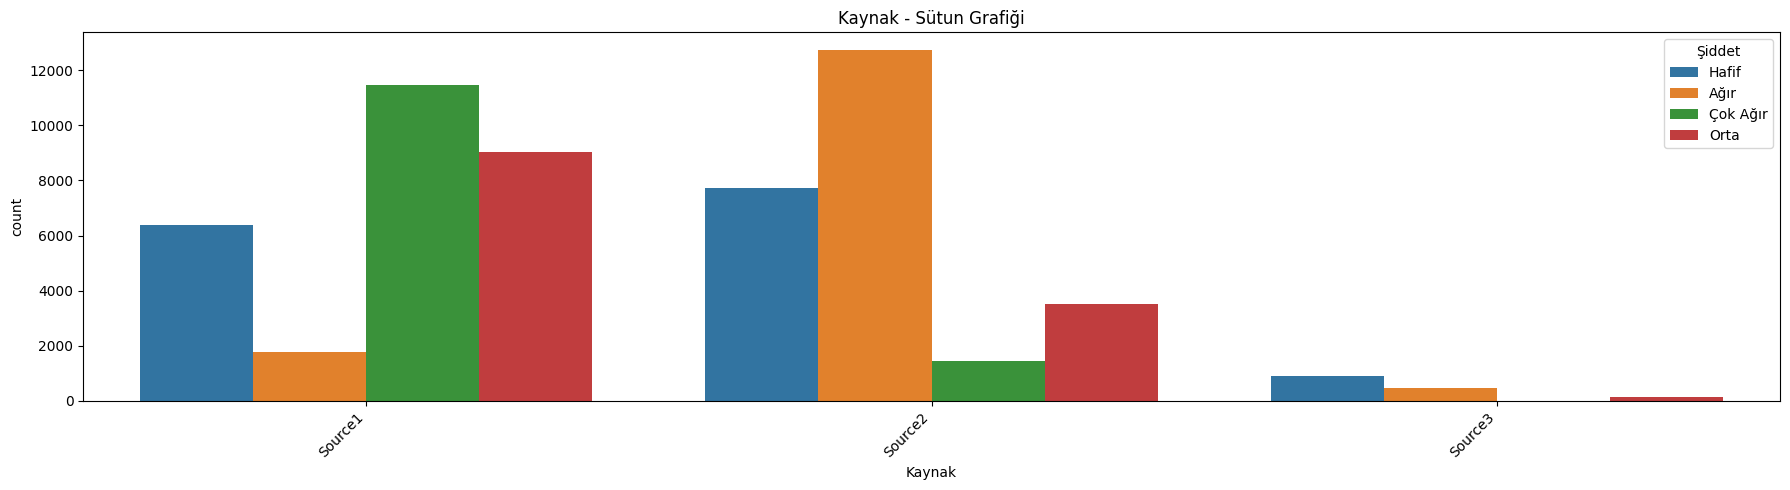

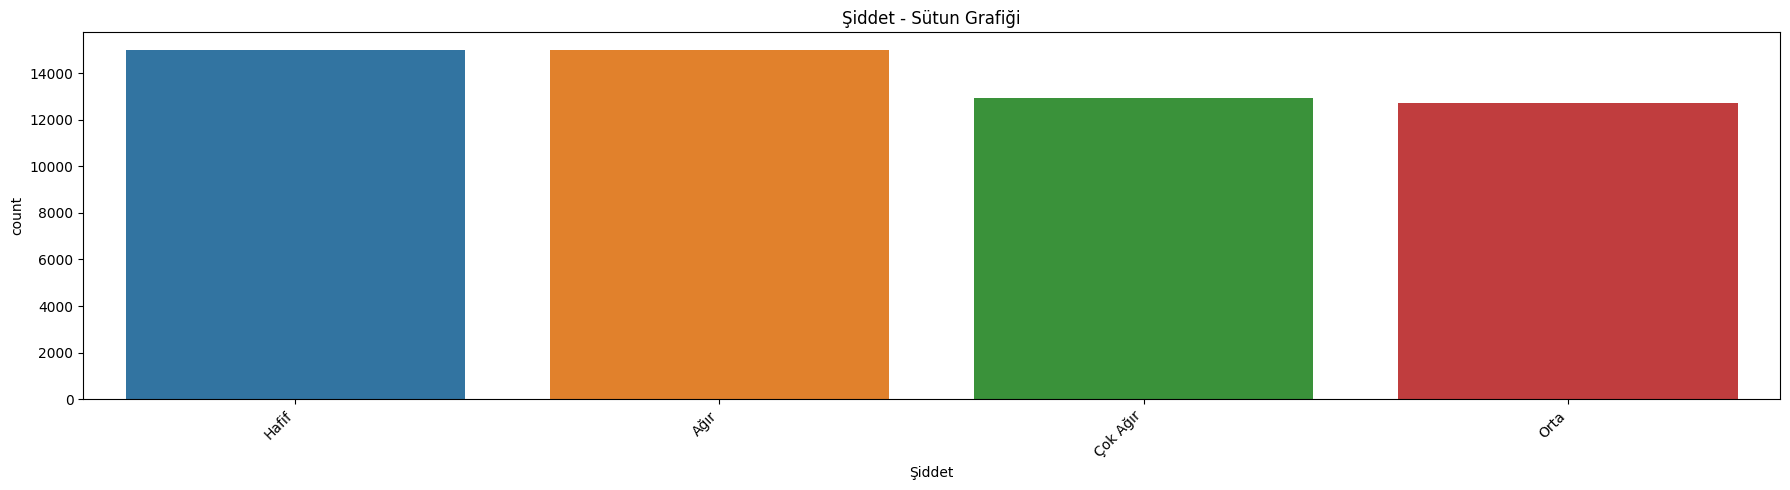

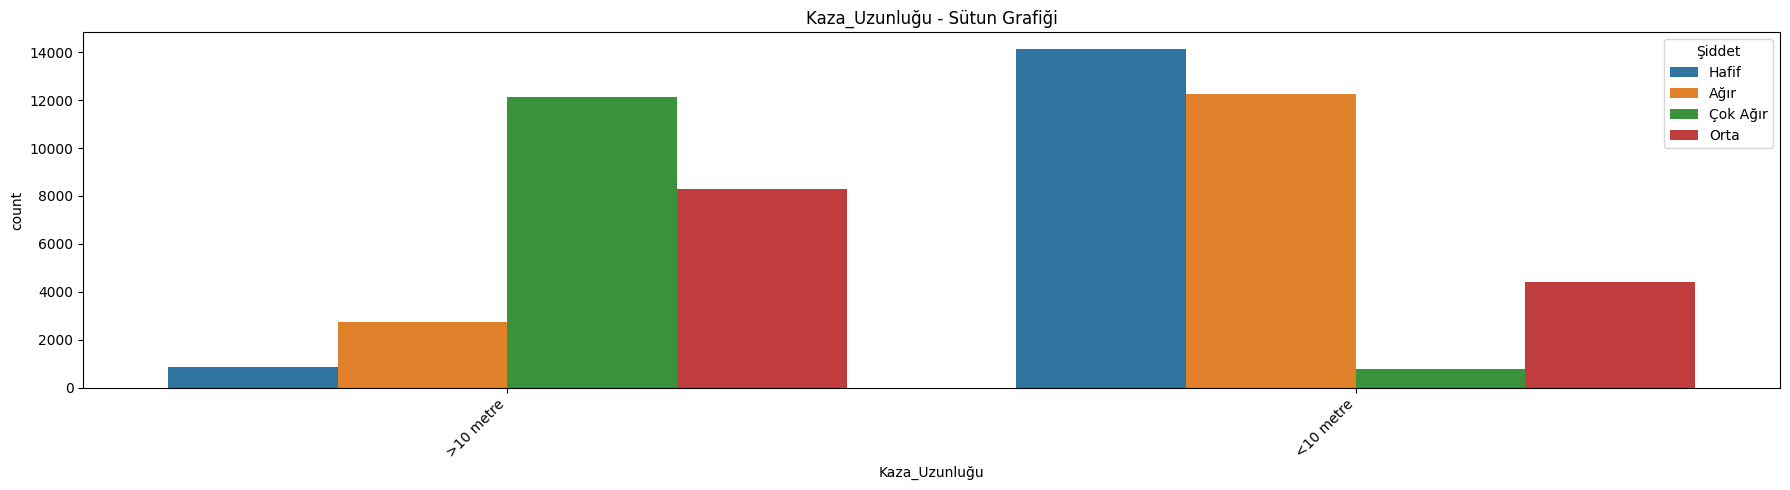

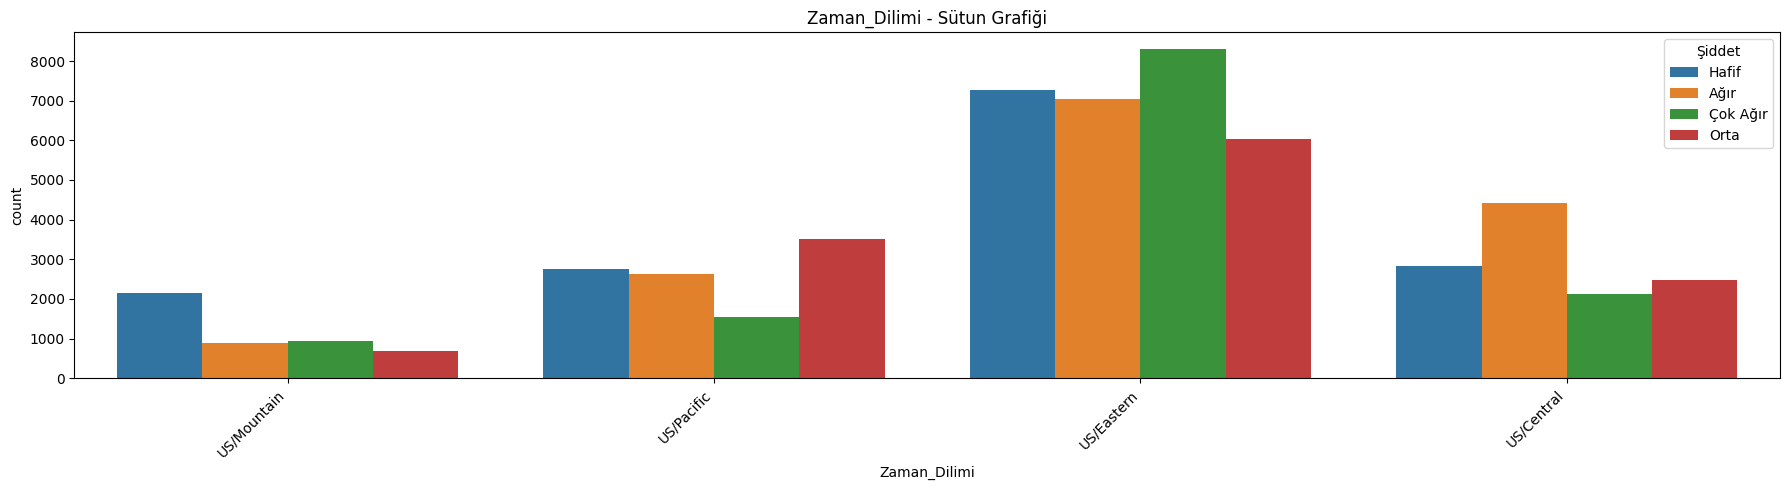

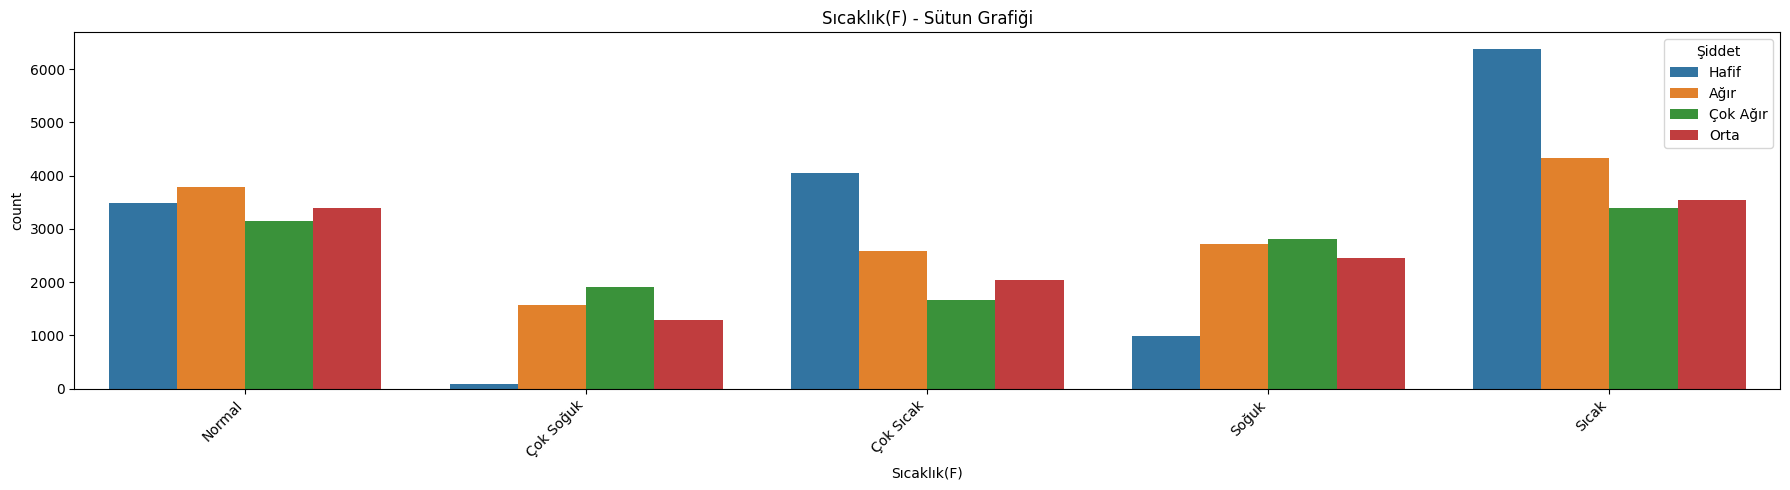

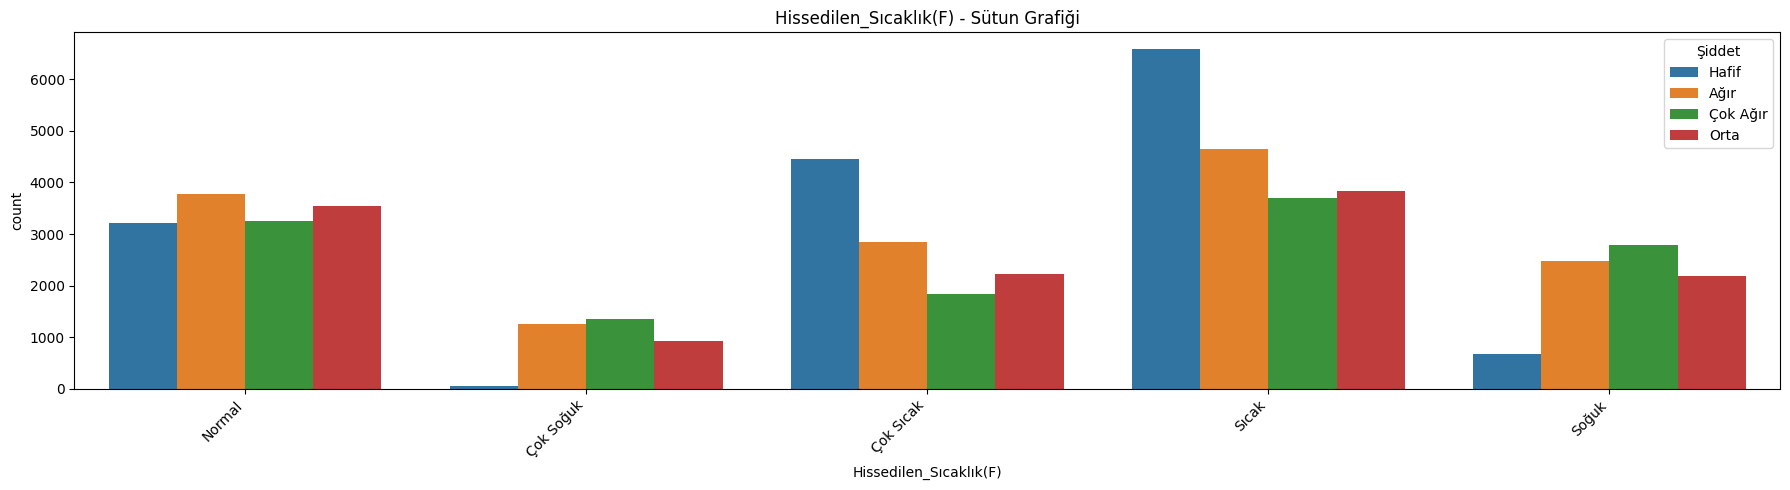

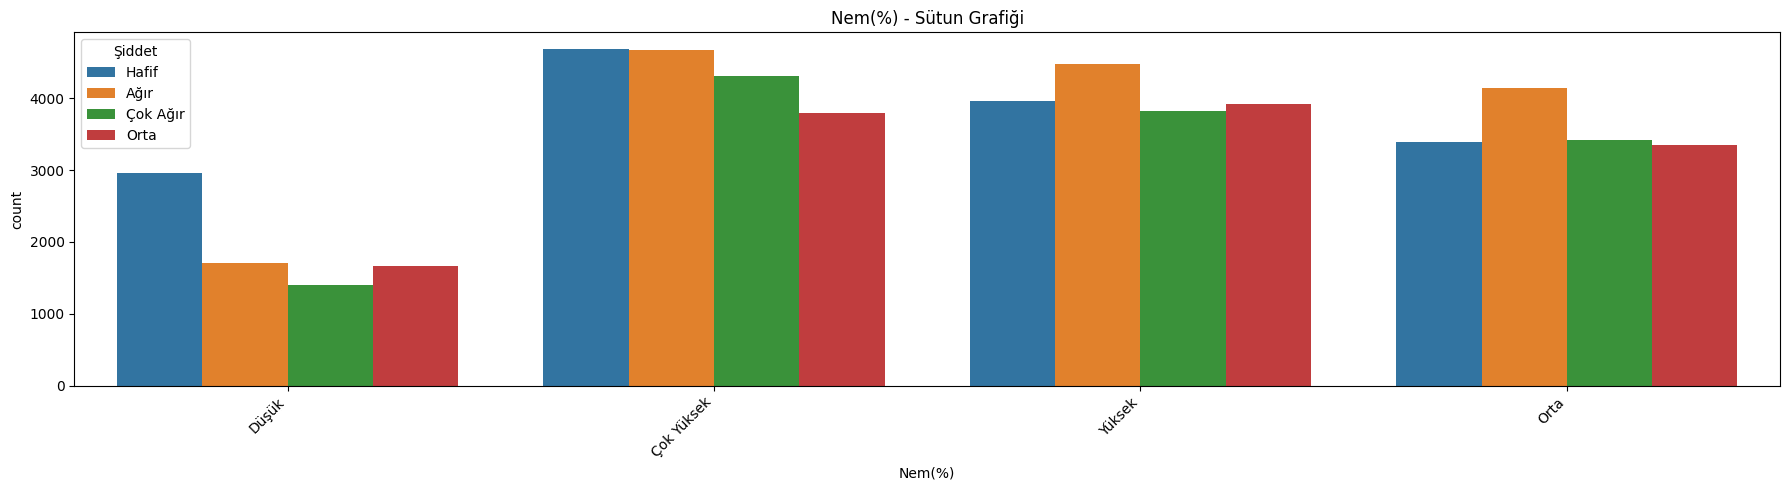

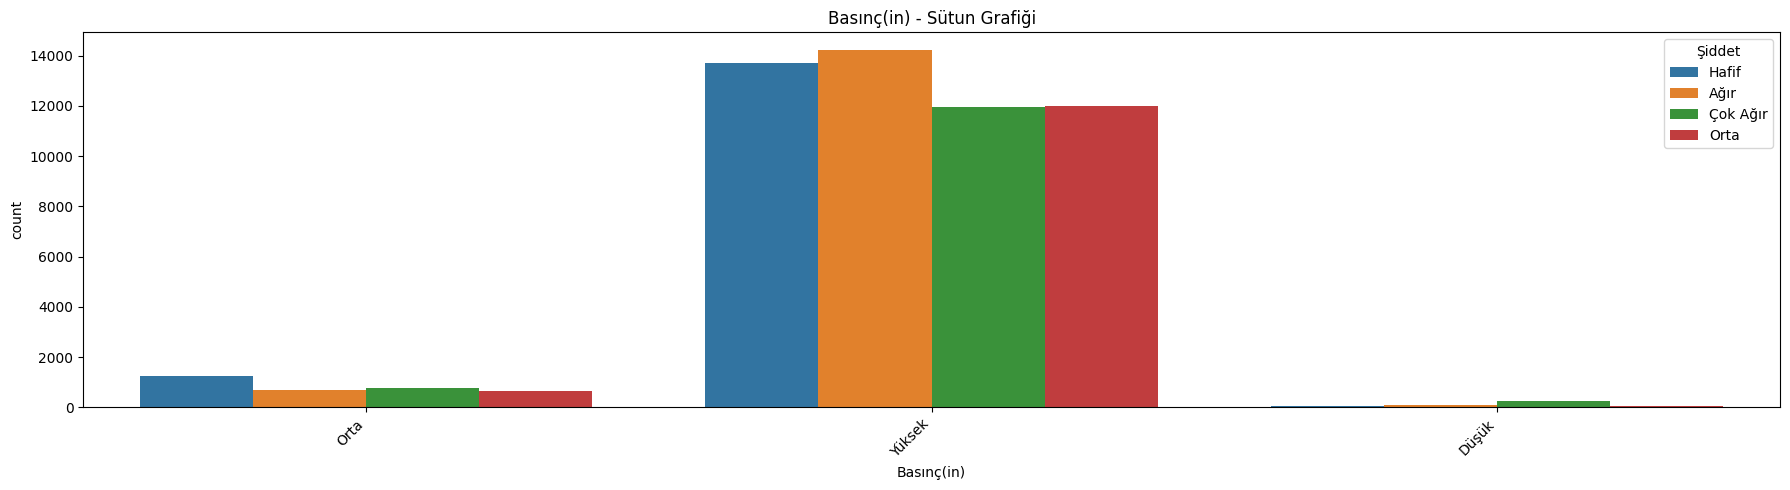

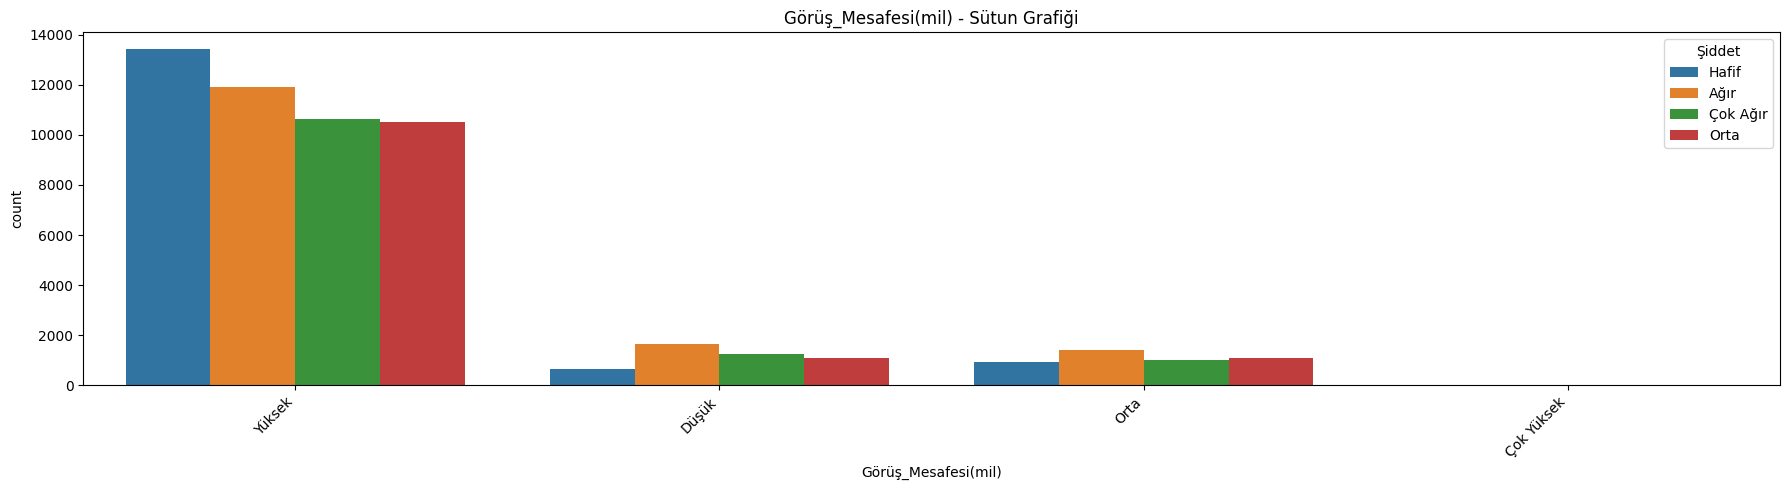

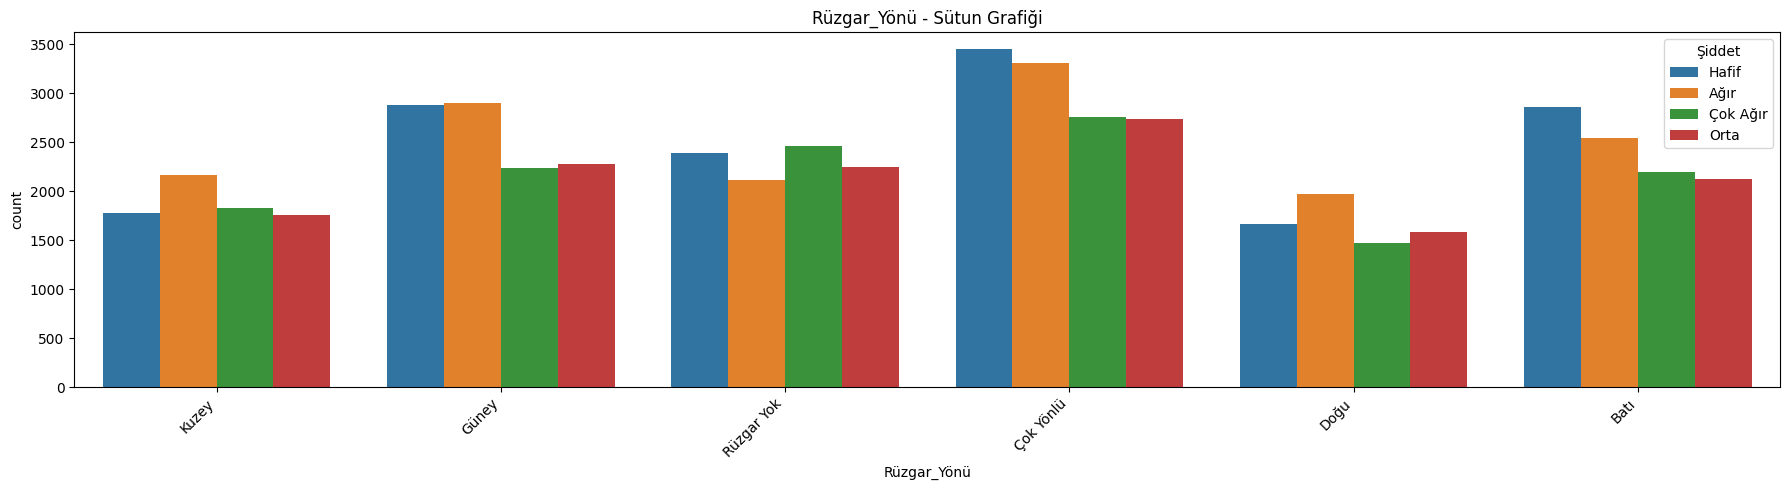

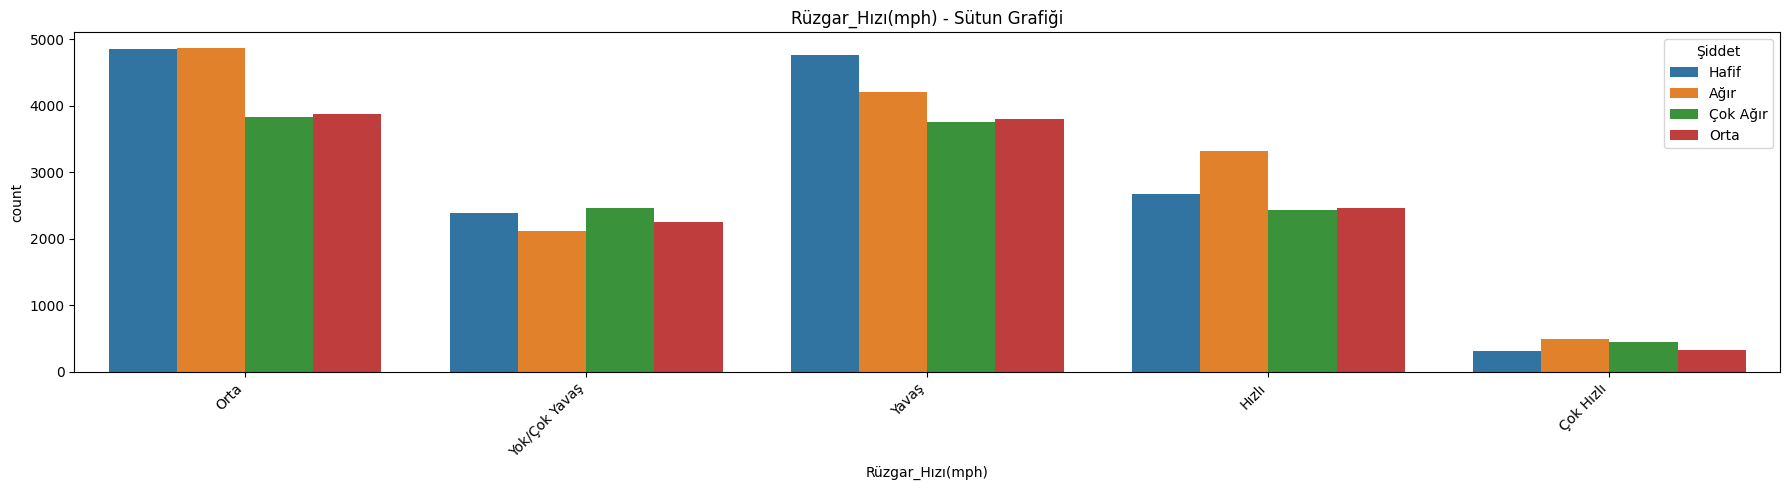

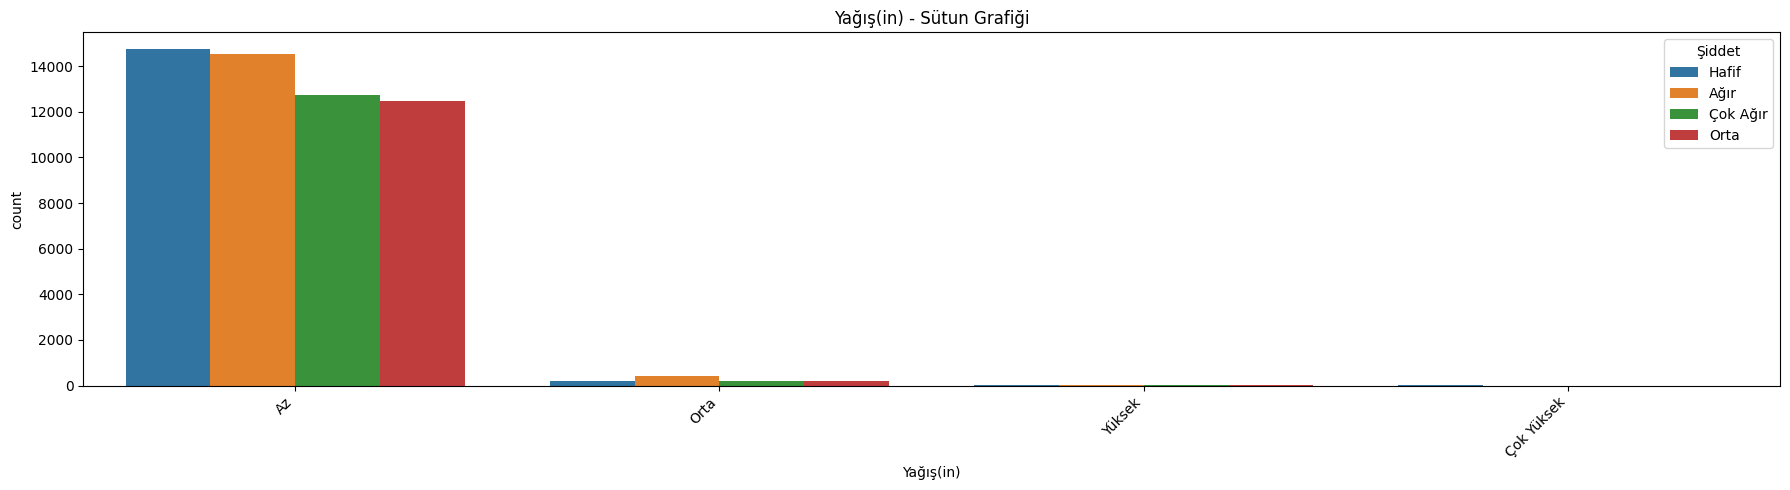

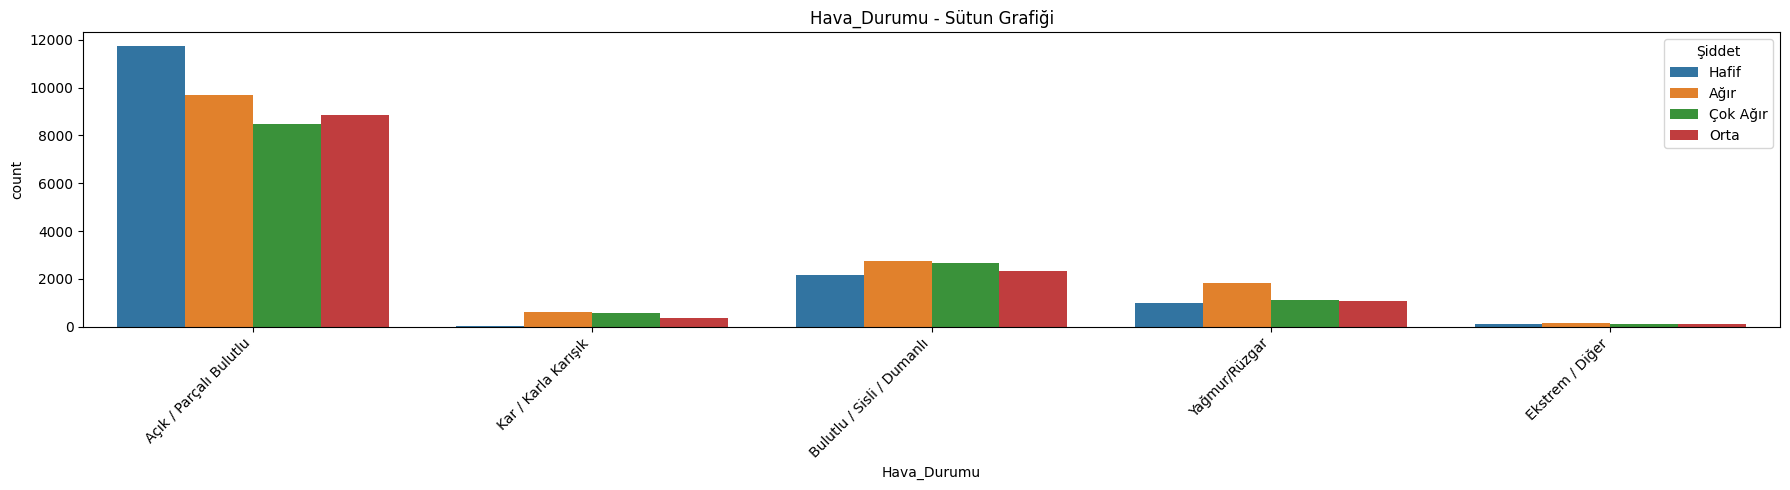

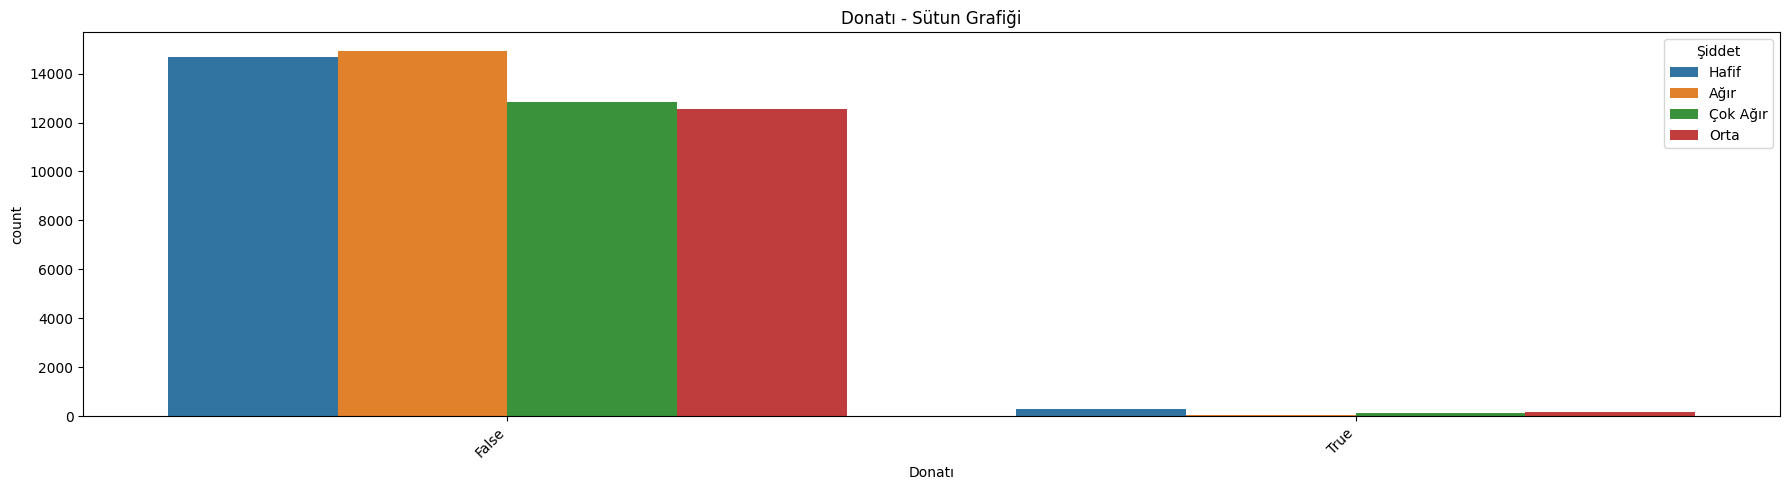

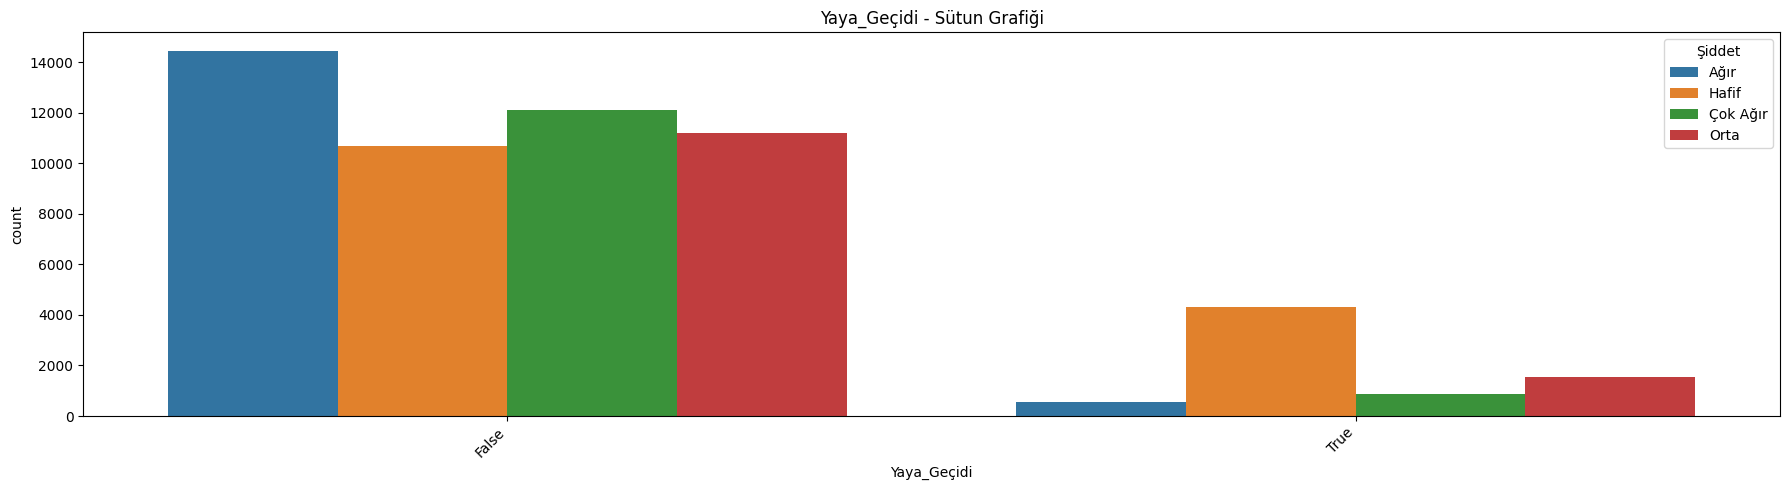

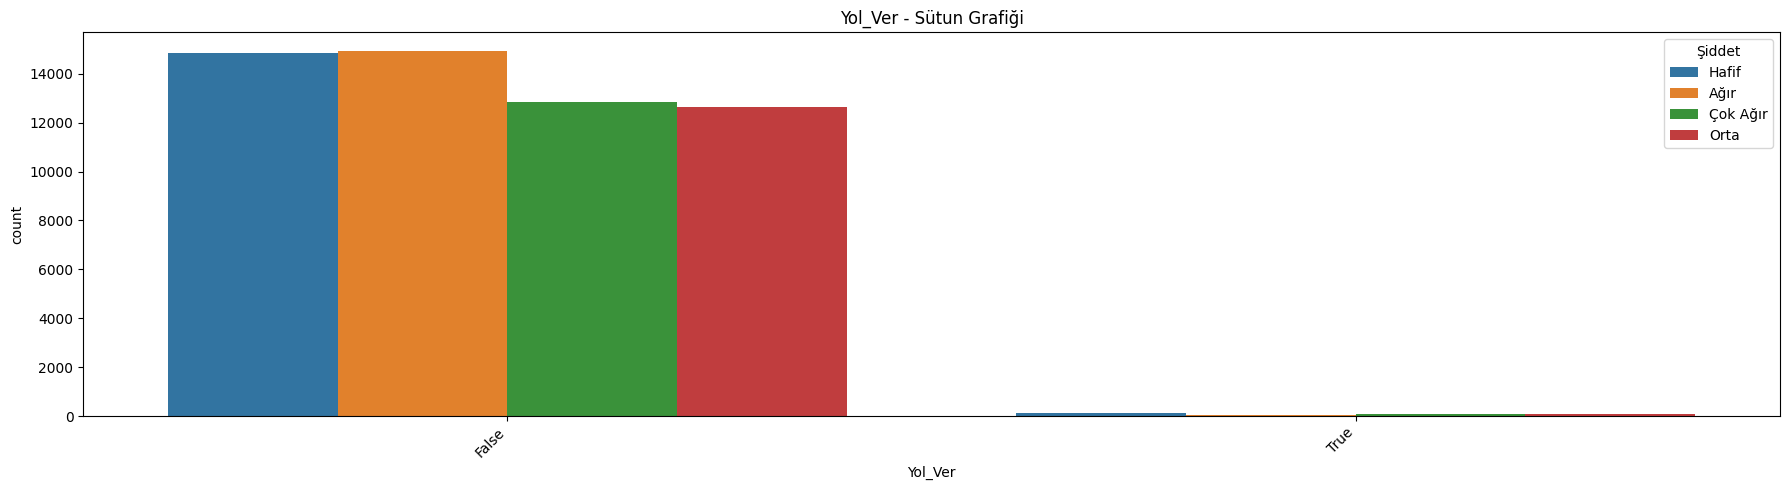

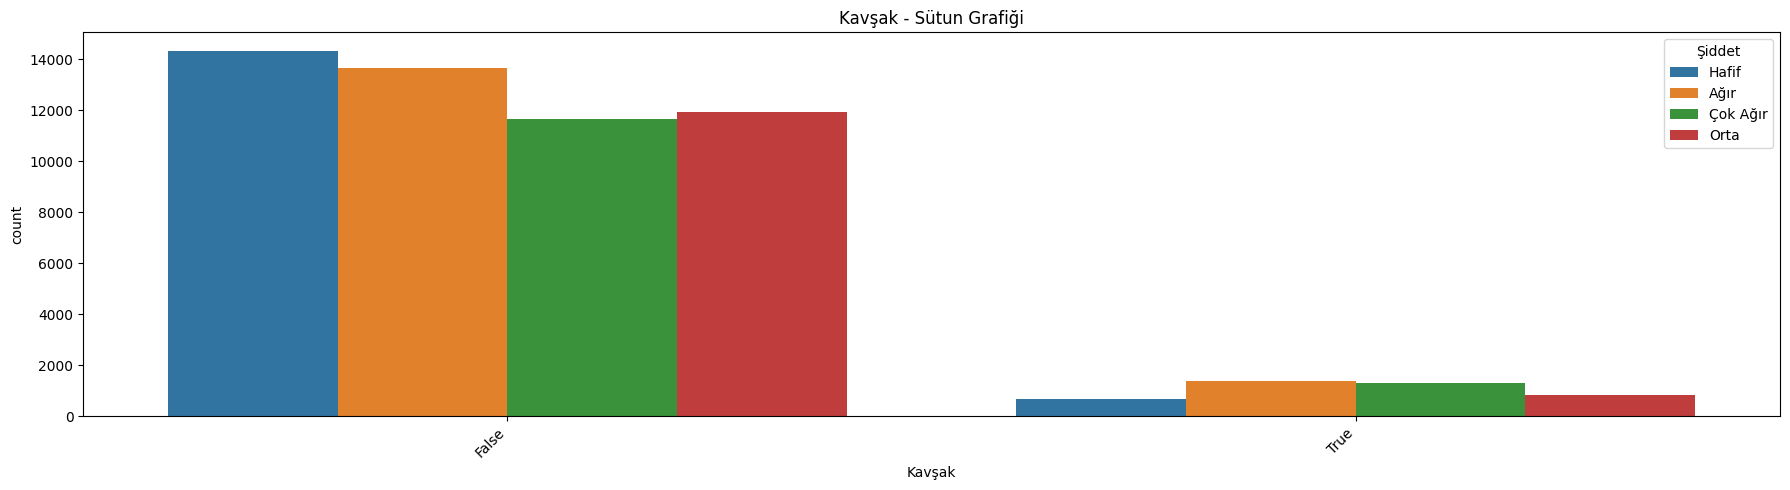

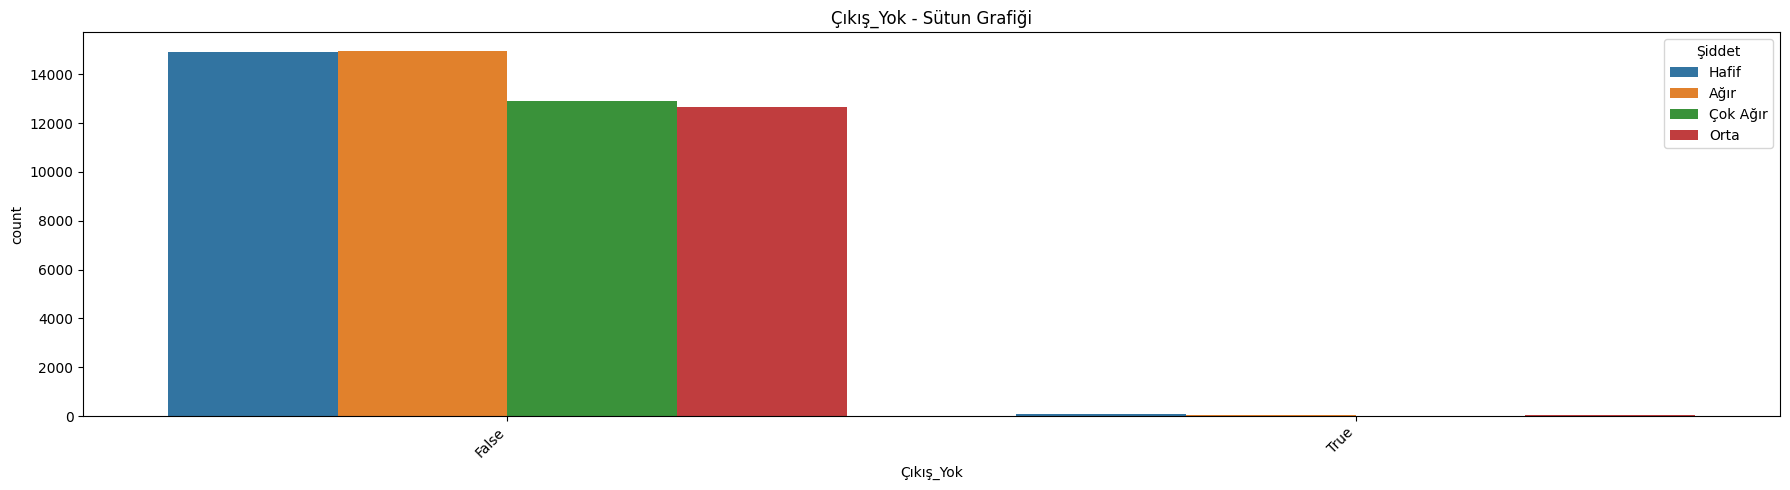

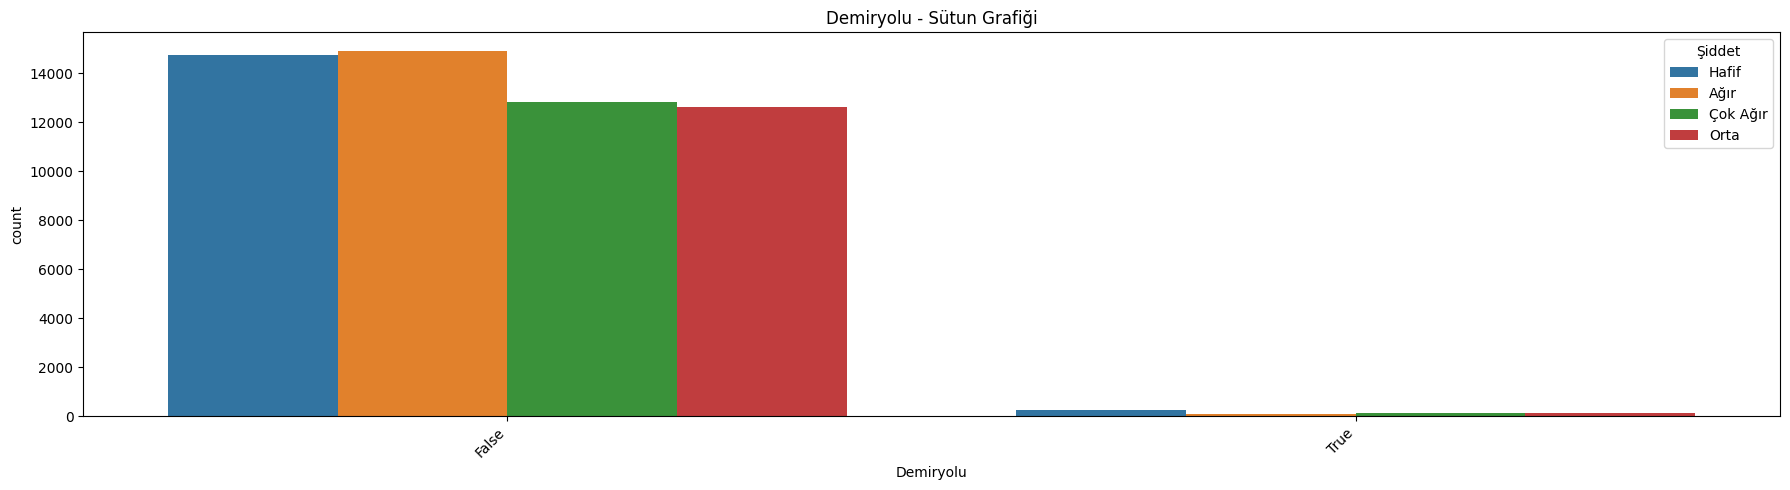

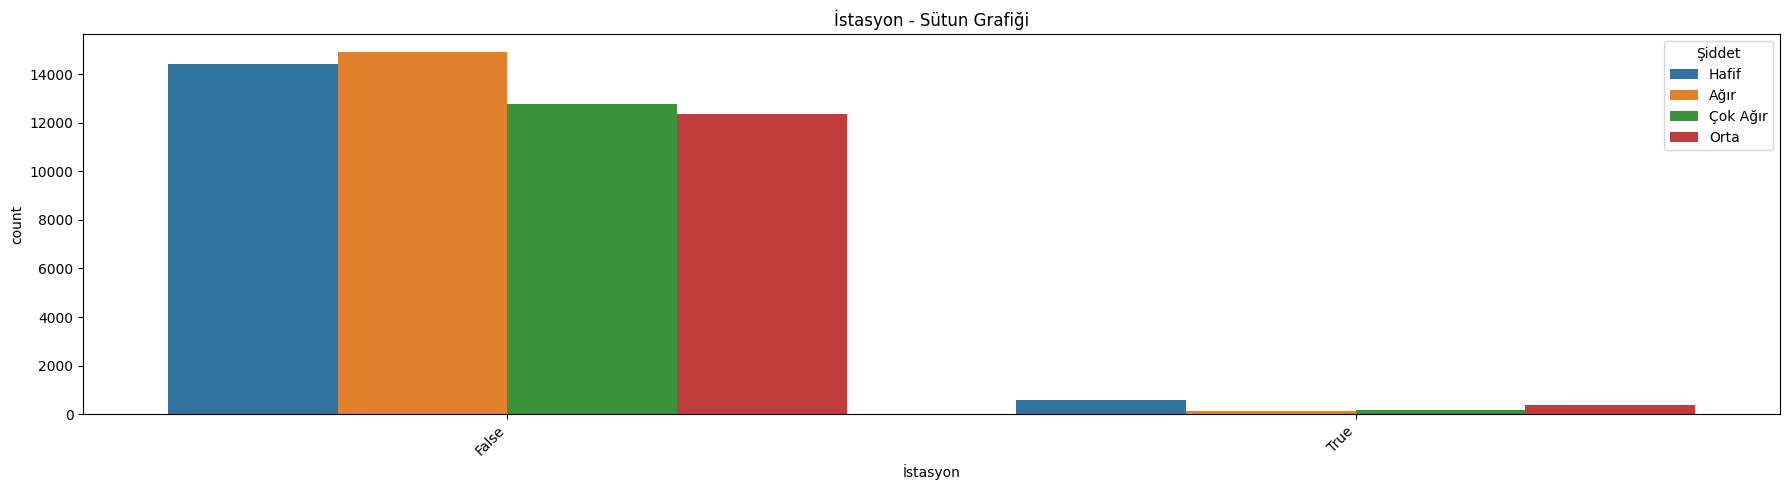

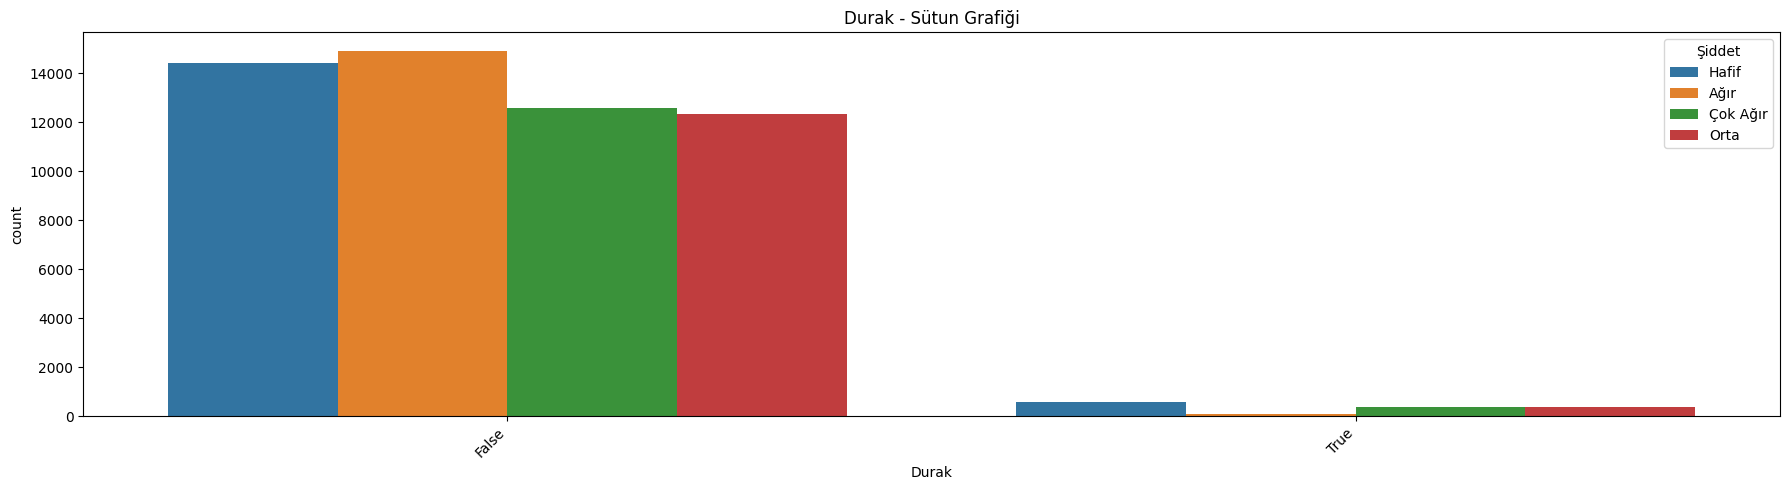

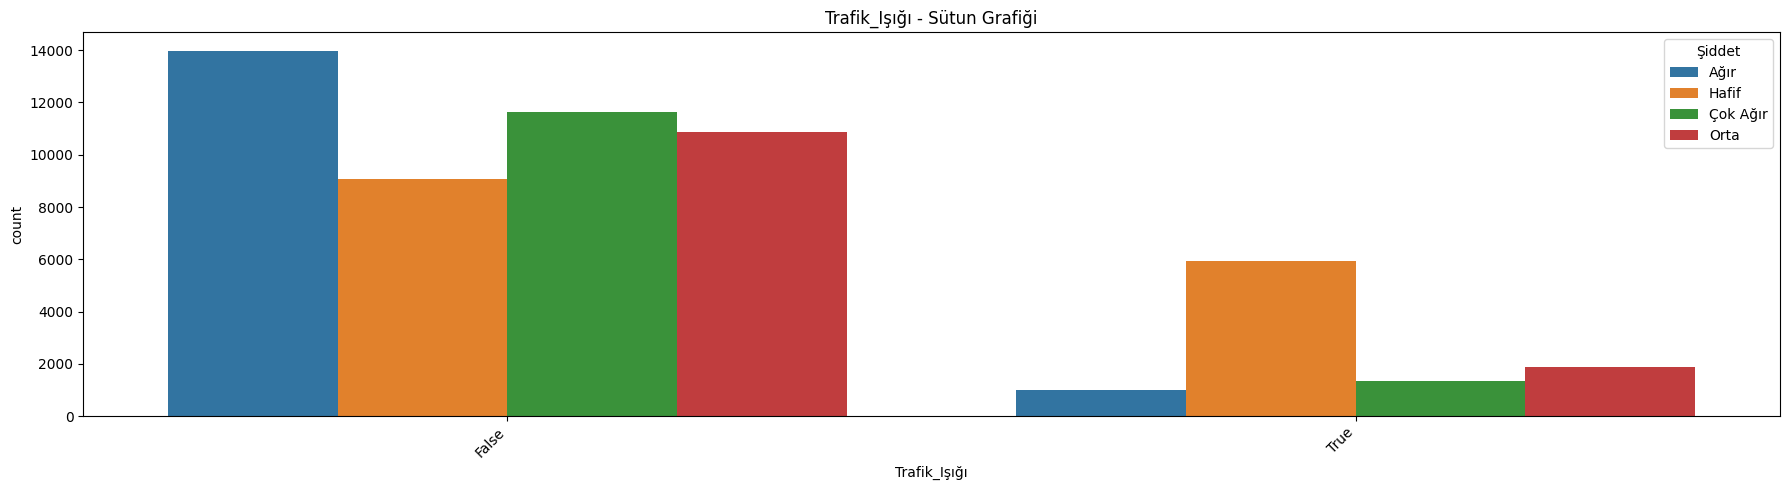

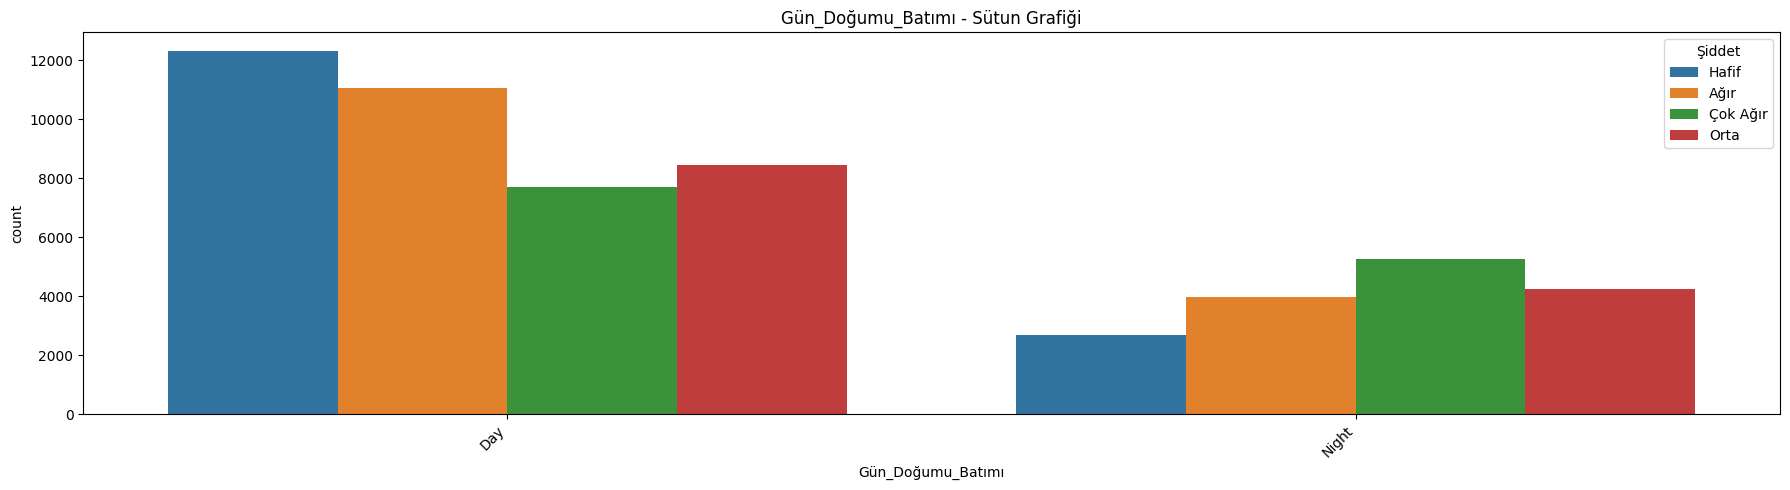

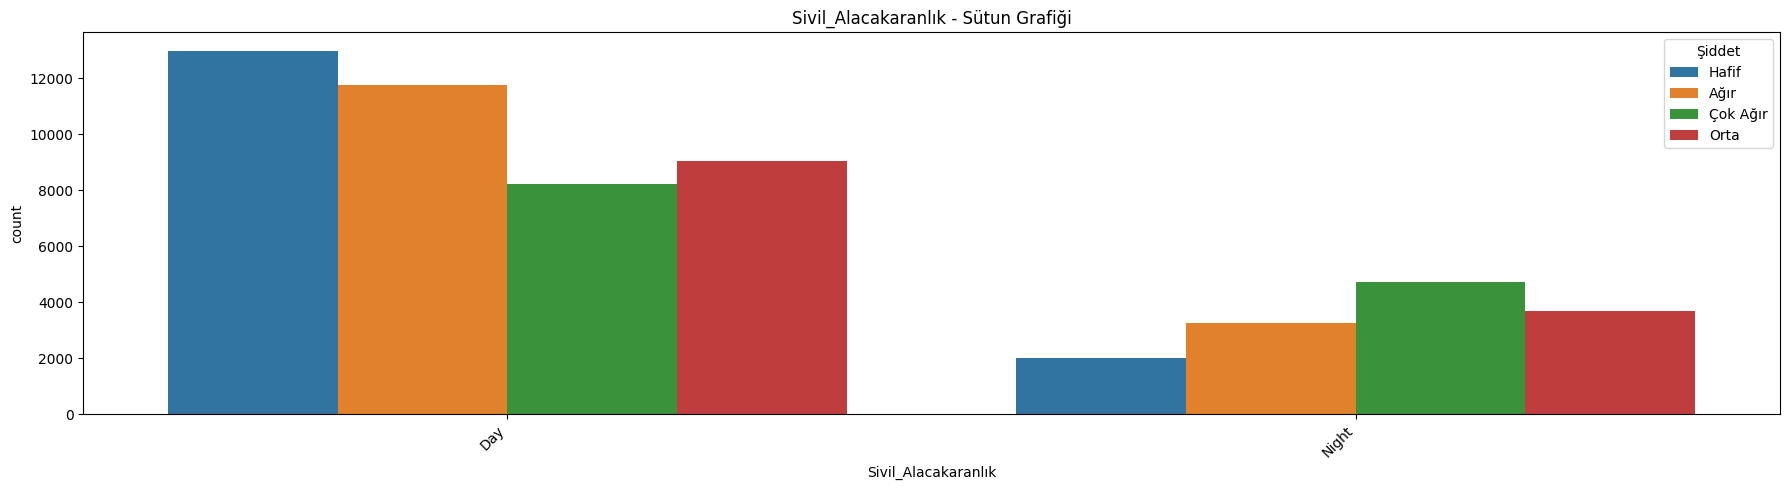

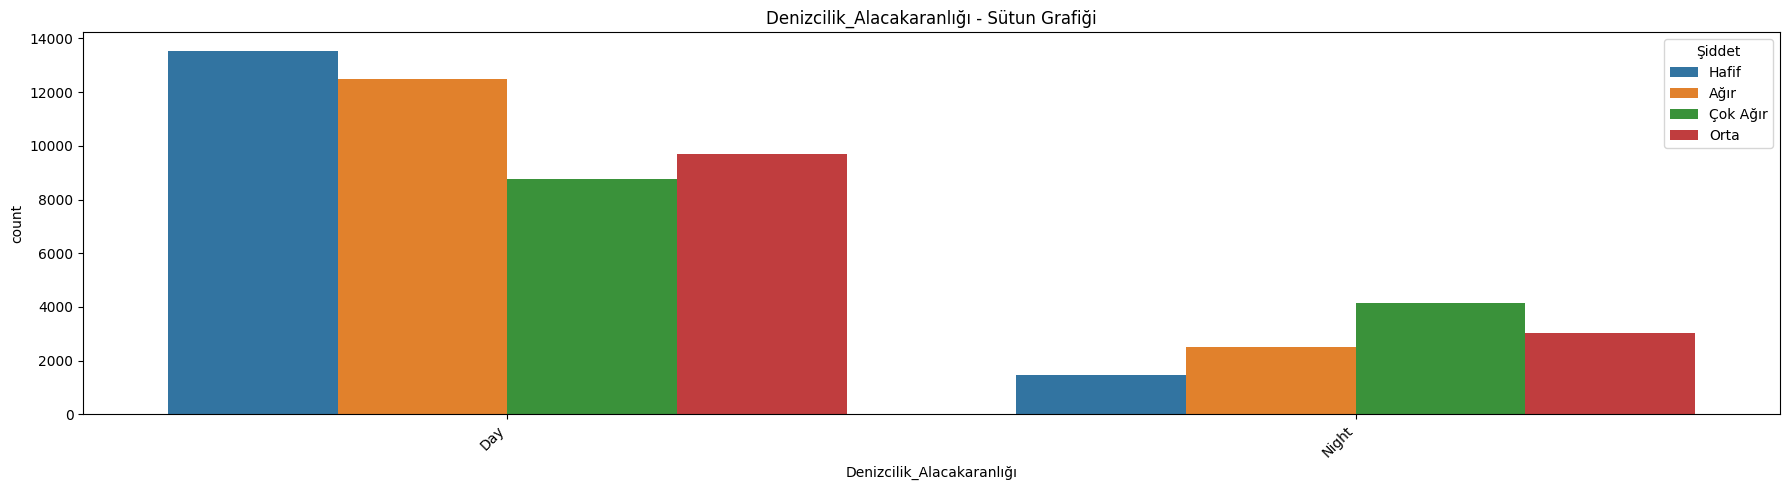

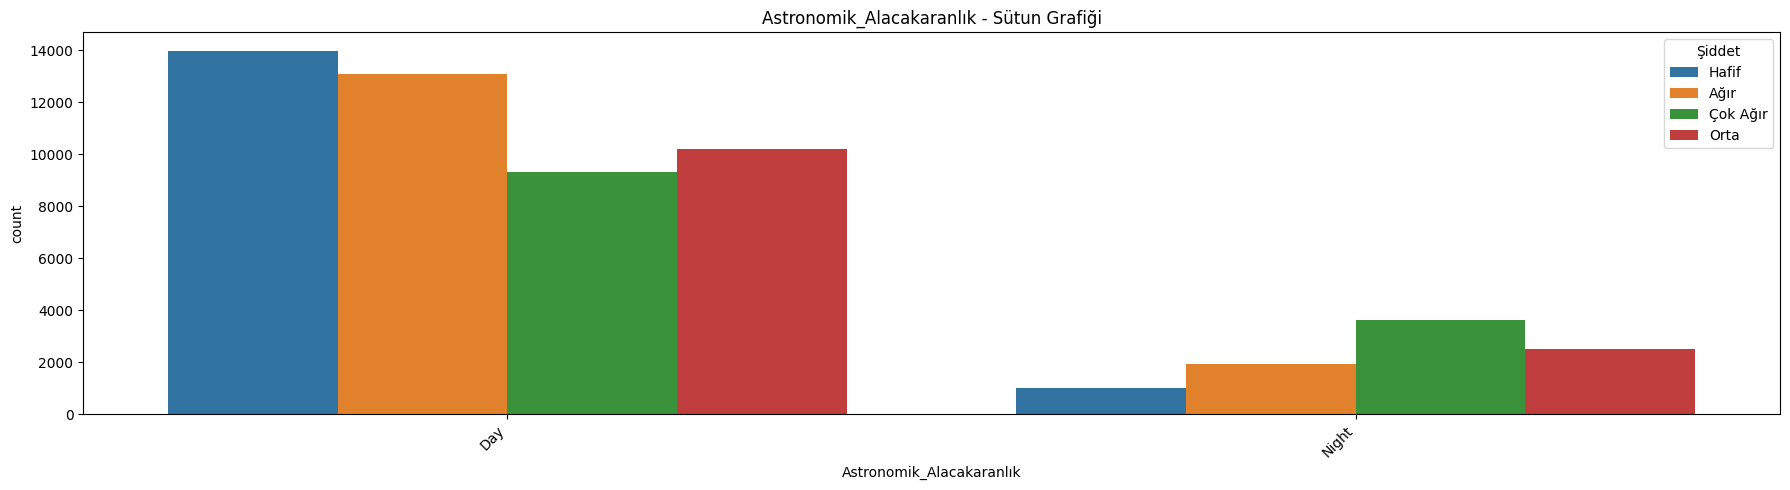

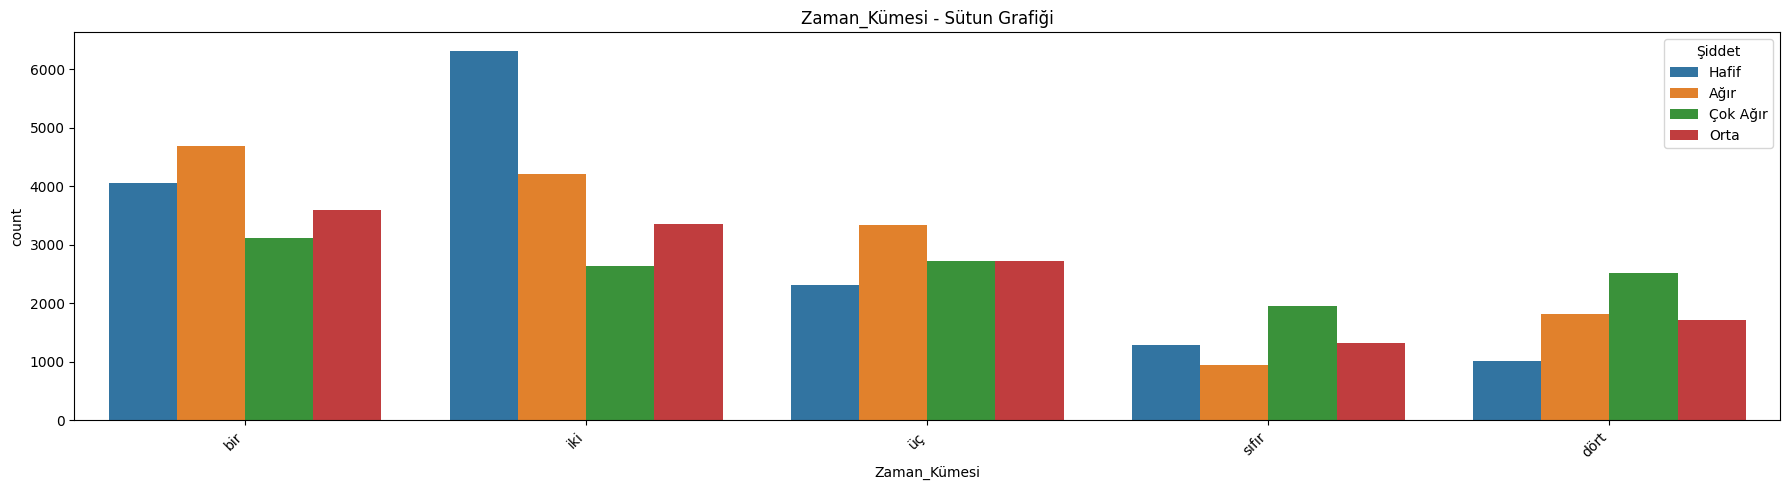

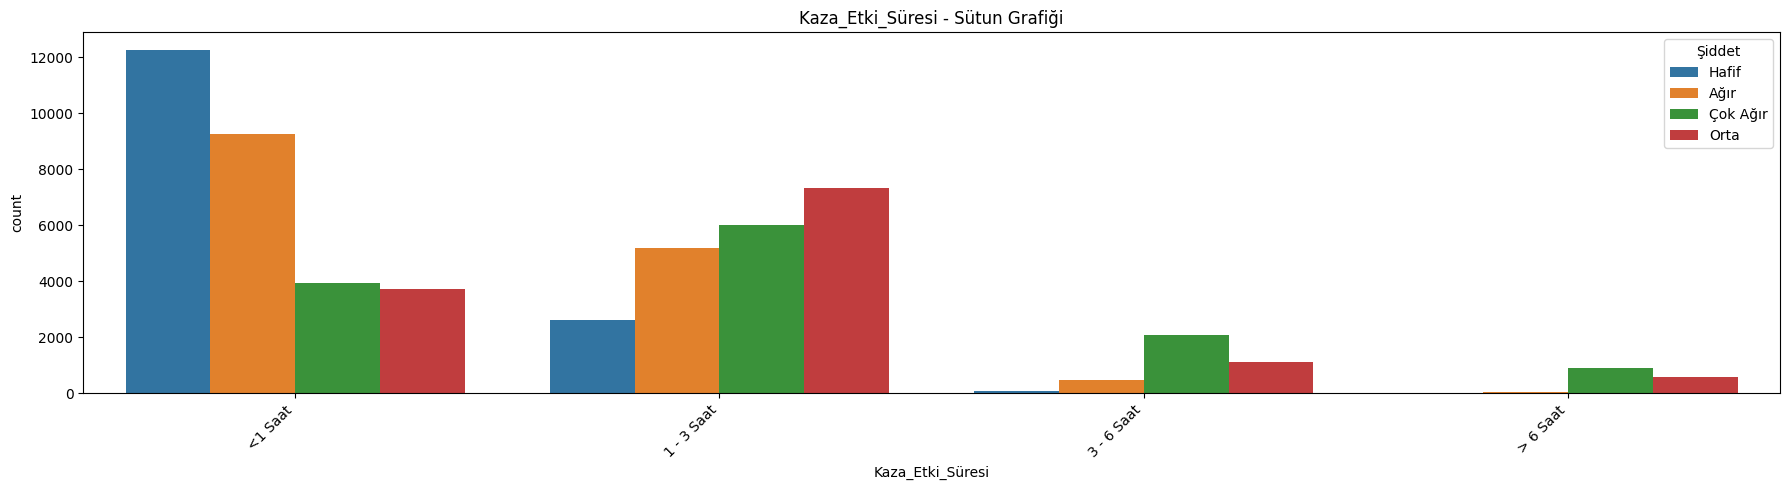

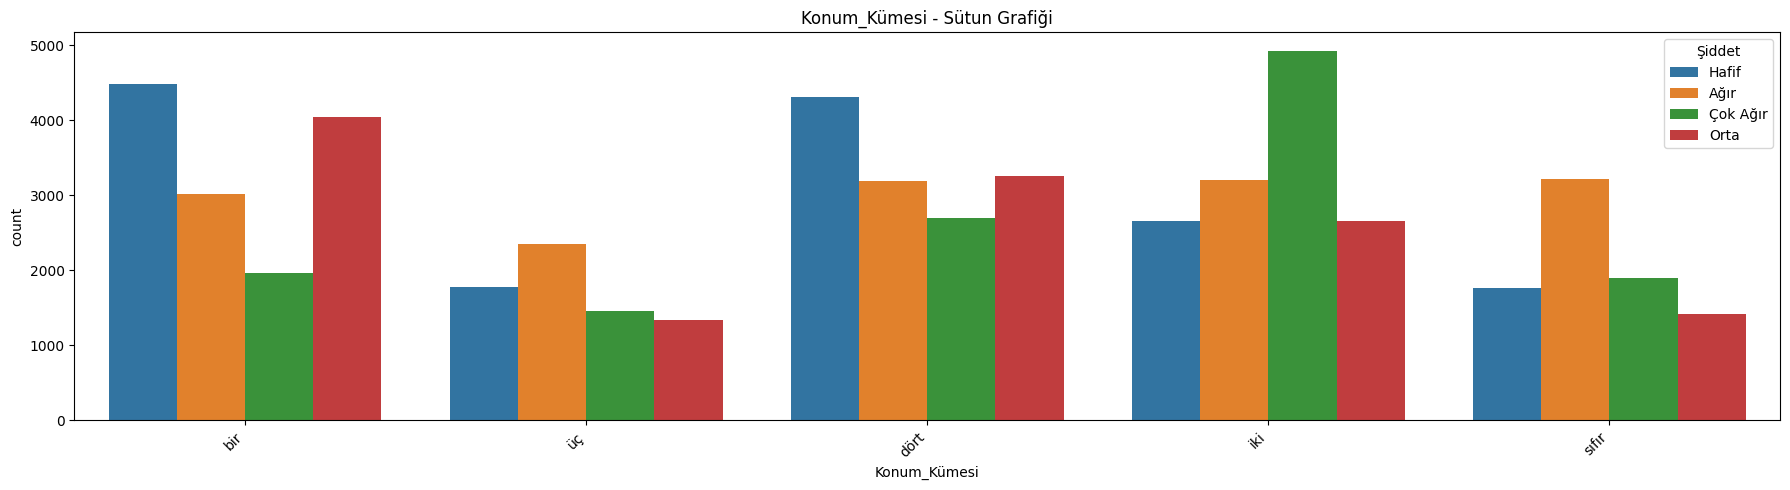

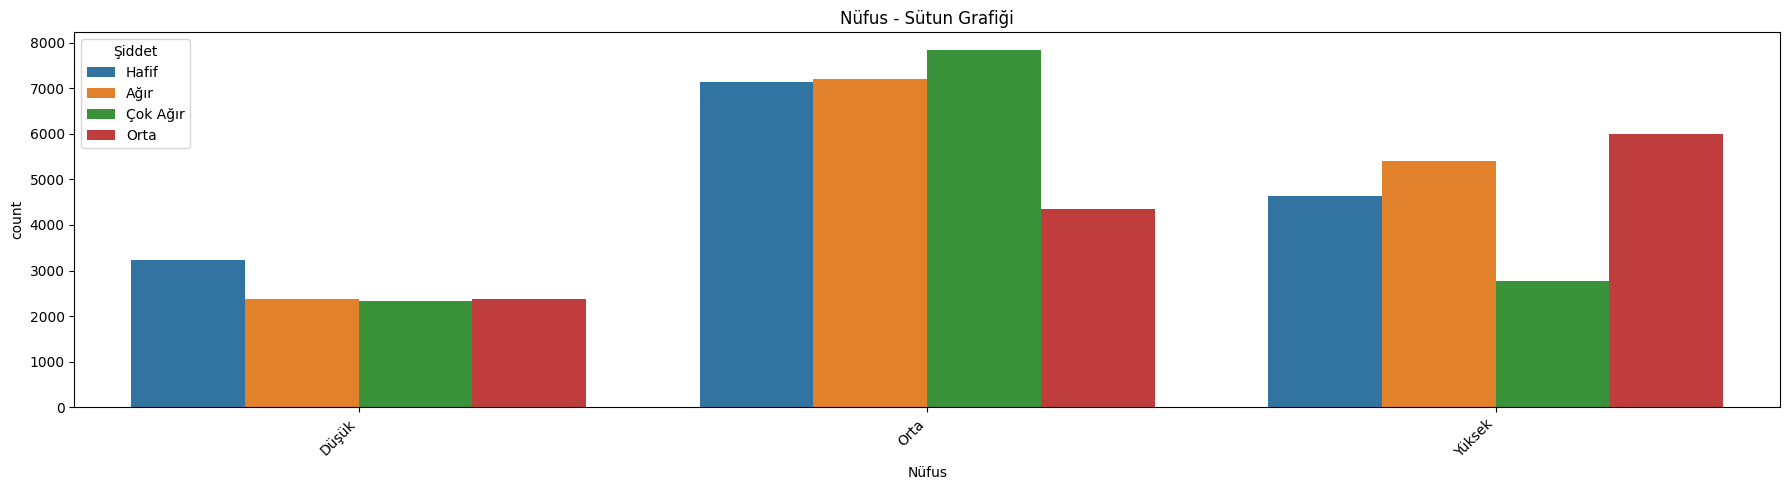

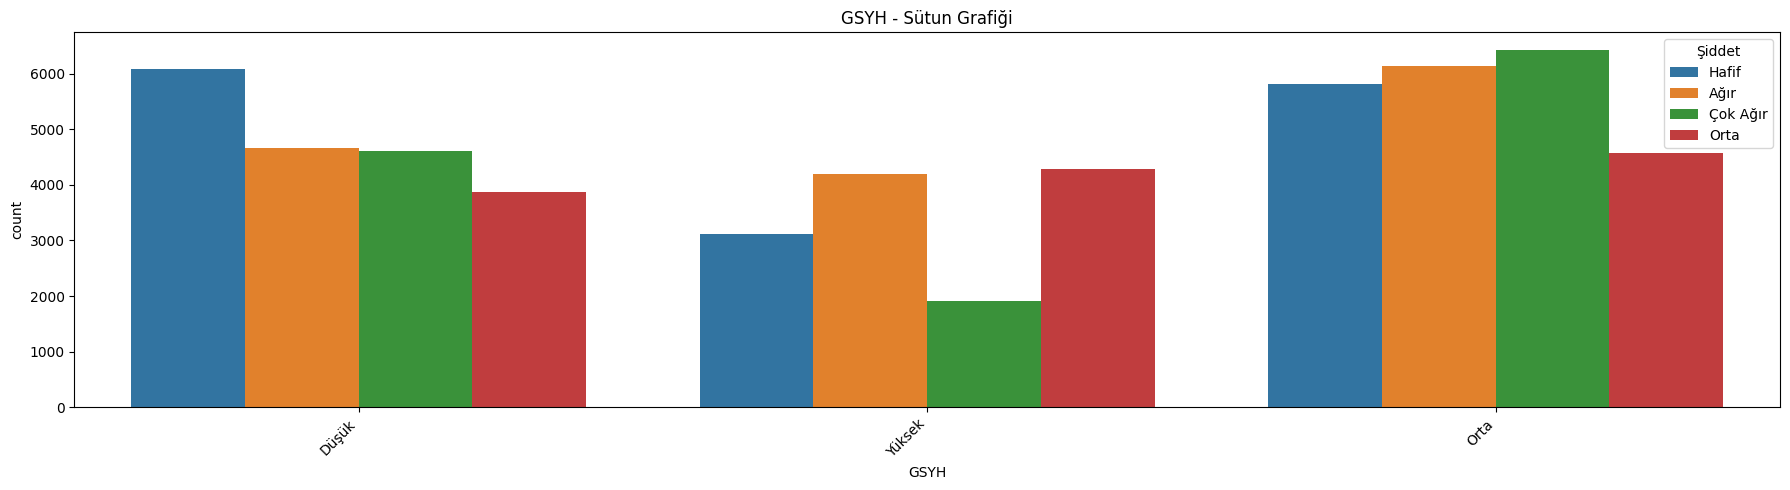

In [42]:
for sutun in df_turkce.columns:
    plt.figure(figsize=(18, 5))

    # Countplot (sütun grafiği)
    plt.subplot(1, 1, 1)
    sns.countplot(data=df_turkce, x=sutun, hue='Şiddet')
    plt.title(f'{sutun} - Sütun Grafiği')
    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

## Etiketlerin Girdilere Göre Yüzdelik Dağılımları

In [43]:
sonuclar = {}

for sutun in df_turkce.columns:
    yuzde_dağılım = df_turkce.groupby([sutun, 'Şiddet']).size().unstack().fillna(0)
    
    yuzde_dağılım = yuzde_dağılım.apply(lambda x: 100 * x / x.sum(), axis=1)
       
    sonuclar[sutun] = yuzde_dağılım
for sutun, sonuc in sonuclar.items():
    print(f"--- {sutun} ---")
    print(sonuc)
    print("\n")

--- Kaynak ---
Şiddet        Ağır      Hafif       Orta   Çok Ağır
Kaynak                                             
Source1   6.233866  22.231912  31.507709  40.026512
Source2  50.043222  30.357564  13.870334   5.728880
Source3  30.953926  58.338741  10.058404   0.648929


--- Şiddet ---
Şiddet     Ağır  Hafif   Orta  Çok Ağır
Şiddet                                 
Ağır      100.0    0.0    0.0       0.0
Hafif       0.0  100.0    0.0       0.0
Orta        0.0    0.0  100.0       0.0
Çok Ağır    0.0    0.0    0.0     100.0


--- Kaza_Uzunluğu ---
Şiddet              Ağır      Hafif       Orta   Çok Ağır
Kaza_Uzunluğu                                            
<10 metre      38.777577  44.718767  14.006267   2.497389
>10 metre      11.423703   3.615359  34.458112  50.502826


--- Zaman_Dilimi ---
Şiddet             Ağır      Hafif       Orta   Çok Ağır
Zaman_Dilimi                                            
US/Central    37.327267  23.811931  20.896528  17.964274
US/Eastern    24.5

## Korelasyon Matrisi

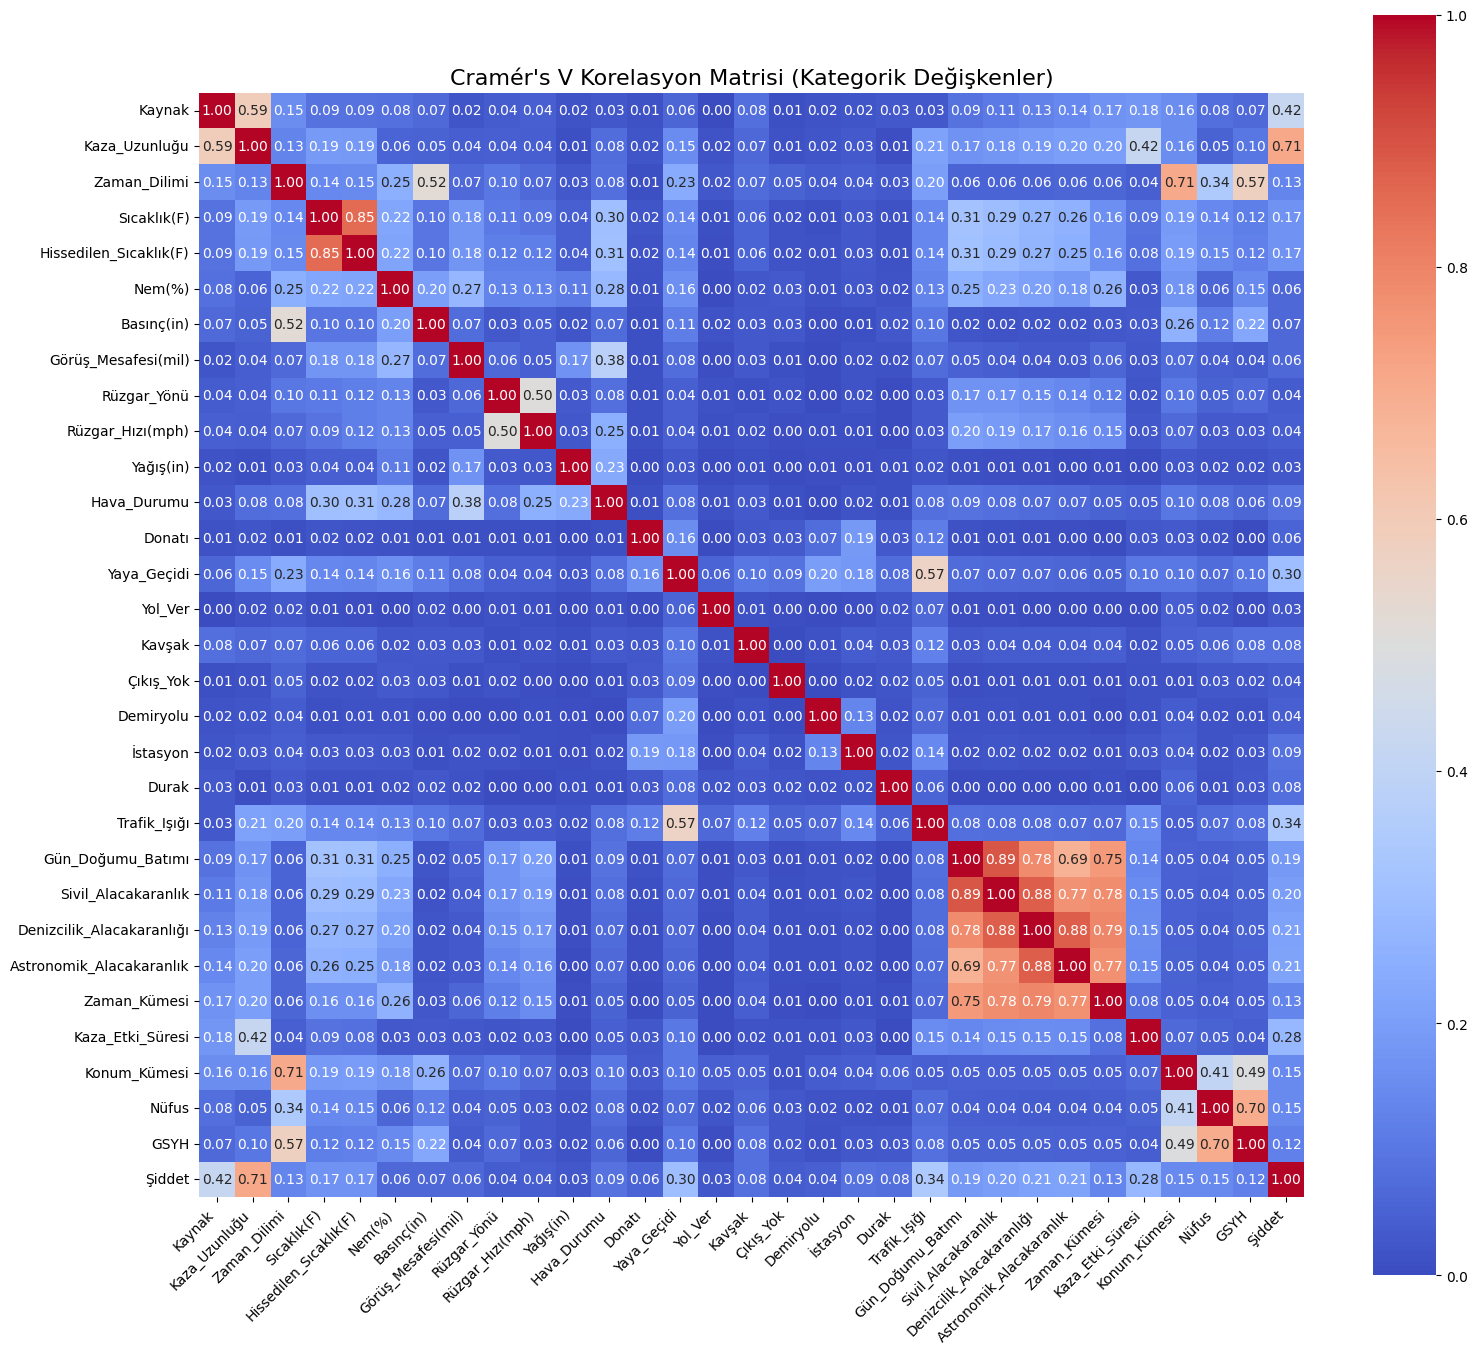

In [44]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))


x_sutunlari = [col for col in df_turkce.columns if col != 'Şiddet']
tum_sutunlar = x_sutunlari + ['Şiddet']

korelasyon_matrisi = pd.DataFrame(index=tum_sutunlar, columns=tum_sutunlar)

for col1 in tum_sutunlar:
    for col2 in tum_sutunlar:
        try:
            korelasyon_matrisi.loc[col1, col2] = cramers_v(df_turkce[col1], df_turkce[col2])
        except:
            korelasyon_matrisi.loc[col1, col2] = np.nan

korelasyon_matrisi = korelasyon_matrisi.astype(float)

plt.figure(figsize=(16, 14))
sns.heatmap(korelasyon_matrisi, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Cramér's V Korelasyon Matrisi (Kategorik Değişkenler)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Özellik Seçme ve Seçilen Özelliklere Göre Veriyi Bölme İşlemleri

In [45]:
# Tüm Özellikler
X = df_turkce.drop("Şiddet", axis=1)
y = df_turkce["Şiddet"]

In [46]:
En_Cok5 = [
    "Kaza_Uzunluğu",
    "Kaynak",
    "Trafik_Işığı",
    "Yaya_Geçidi",
    "Kaza_Etki_Süresi"
]
En_Cok9 = [
    "Kaza_Uzunluğu",
    "Kaynak",
    "Trafik_Işığı",
    "Yaya_Geçidi",
    "Kaza_Etki_Süresi",
    "Astronomik_Alacakaranlık",
    "Denizcilik_Alacakaranlığı",
    "Sivil_Alacakaranlık",
    "Gün_Doğumu_Batımı"
]
En_Cok16 = [
    "Kaza_Uzunluğu",
    "Kaynak",
    "Trafik_Işığı",
    "Yaya_Geçidi",
    "Kaza_Etki_Süresi",
    "Astronomik_Alacakaranlık",
    "Denizcilik_Alacakaranlığı",
    "Sivil_Alacakaranlık",
    "Gün_Doğumu_Batımı",
    "Sıcaklık(F)",
    "Hissedilen_Sıcaklık(F)",
    "Konum_Kümesi",
    "Nüfus",
    "Zaman_Kümesi",
    "Zaman_Dilimi",
    "GSYH"   
]

X_matrise_gore_5 = df_turkce[En_Cok5].copy()
X_matrise_gore_9 = df_turkce[En_Cok9].copy()
X_matrise_gore_16 = df_turkce[En_Cok16].copy()

In [47]:
label_encoder = LabelEncoder()
for sütun in X.columns:
    if X[sütun].dtype == 'object' or X[sütun].dtype.name == 'category':
        X[sütun] = label_encoder.fit_transform(X[sütun])

for sütun in X_matrise_gore_5.columns:
    if X_matrise_gore_5[sütun].dtype == 'object' or X_matrise_gore_5[sütun].dtype.name == 'category':
        X_matrise_gore_5[sütun] = label_encoder.fit_transform(X_matrise_gore_5[sütun])

for sütun in X_matrise_gore_9.columns:
    if X_matrise_gore_9[sütun].dtype == 'object' or X_matrise_gore_9[sütun].dtype.name == 'category':
        X_matrise_gore_9[sütun] = label_encoder.fit_transform(X_matrise_gore_9[sütun])

for sütun in X_matrise_gore_16.columns:
    if X_matrise_gore_16[sütun].dtype == 'object' or X_matrise_gore_16[sütun].dtype.name == 'category':
        X_matrise_gore_16[sütun] = label_encoder.fit_transform(X_matrise_gore_16[sütun])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train_5, X_test_5, y_train5, y_test5 = train_test_split(
    X_matrise_gore_5, y, test_size=0.25, random_state=42, stratify=y
)

X_train_9, X_test_9, y_train9, y_test9 = train_test_split(
    X_matrise_gore_9, y, test_size=0.25, random_state=42, stratify=y
)
X_train_16, X_test_16, y_train16, y_test16 = train_test_split(
    X_matrise_gore_16, y, test_size=0.25, random_state=42, stratify=y
)

In [49]:
from sklearn.feature_selection import SelectKBest, chi2
selector_chi2 = SelectKBest(score_func=chi2, k=8) 
selector_chi2.fit(X_train, y_train)

secilen_indeksler = selector_chi2.get_support(indices=True)
secilen_sutunlar = X_train.columns[secilen_indeksler]

print("Chi2 ile seçilen 8 özellik:")
print(secilen_sutunlar)

selector_chi2_2 = SelectKBest(score_func=chi2, k=16) 
selector_chi2_2.fit(X_train, y_train)

secilen_indeksler2 = selector_chi2_2.get_support(indices=True)
secilen_sutunlar2 = X_train.columns[secilen_indeksler2]

print("Chi2 ile seçilen 16  özellik:")
print(secilen_sutunlar2)

Chi2 ile seçilen 8 özellik:
Index(['Kaynak', 'Kaza_Uzunluğu', 'Hava_Durumu', 'Yaya_Geçidi', 'Trafik_Işığı',
       'Denizcilik_Alacakaranlığı', 'Astronomik_Alacakaranlık',
       'Kaza_Etki_Süresi'],
      dtype='object')
Chi2 ile seçilen 16  özellik:
Index(['Kaynak', 'Kaza_Uzunluğu', 'Zaman_Dilimi', 'Sıcaklık(F)',
       'Hissedilen_Sıcaklık(F)', 'Hava_Durumu', 'Yaya_Geçidi', 'İstasyon',
       'Trafik_Işığı', 'Gün_Doğumu_Batımı', 'Sivil_Alacakaranlık',
       'Denizcilik_Alacakaranlığı', 'Astronomik_Alacakaranlık',
       'Kaza_Etki_Süresi', 'Konum_Kümesi', 'GSYH'],
      dtype='object')


In [50]:
chi2_8 = [
    "Kaynak",
    "Kaza_Uzunluğu", 
    "Hava_Durumu",
    "Yaya_Geçidi", 
    "Trafik_Işığı", 
    "Denizcilik_Alacakaranlığı", 
    "Astronomik_Alacakaranlık", 
    "Kaza_Etki_Süresi"
  
]
chi2_16 = [
    "Kaynak",
    "Kaza_Uzunluğu",  
    "Zaman_Dilimi", 
    "Sıcaklık(F)", 
    "Hissedilen_Sıcaklık(F)", 
    "Hava_Durumu",
    "Yaya_Geçidi",
    "İstasyon", 
    "Trafik_Işığı", 
    "Gün_Doğumu_Batımı", 
    "Sivil_Alacakaranlık", 
    "Denizcilik_Alacakaranlığı",
    "Astronomik_Alacakaranlık",
    "Kaza_Etki_Süresi", 
    "Konum_Kümesi", 
    "GSYH" 

]

X_chi2_8 = df_turkce[chi2_8].copy()
X_chi2_16 = df_turkce[chi2_16].copy()

for sütun in X_chi2_8.columns:
    if X_chi2_8[sütun].dtype == 'object' or X_chi2_8[sütun].dtype.name == 'category':
        X_chi2_8[sütun] = label_encoder.fit_transform(X_chi2_8[sütun])

for sütun in X_chi2_16.columns:
    if X_chi2_16[sütun].dtype == 'object' or X_chi2_16[sütun].dtype.name == 'category':
        X_chi2_16[sütun] = label_encoder.fit_transform(X_chi2_16[sütun])

X_train_chi2_8, X_test_chi2_8, y_train_chi2_8, y_test_chi2_8 = train_test_split(
    X_chi2_8, y, test_size=0.25, random_state=42, stratify=y
)
X_train_chi2_16, X_test_chi2_16, y_train_chi2_16, y_test_chi2_16 = train_test_split(
    X_chi2_16, y, test_size=0.25, random_state=42, stratify=y
)

## Seçilen Özellik Gruplarından Hangisi Daha İyi Test Ediyoruz

In [51]:
modeller = {
    "Naive Bayes": GaussianNB(),
    "Karar Ağacı": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Yapay Sinir Ağı": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

veri_kumeleri = {
    "Orijinal": (X_train, X_test, y_train, y_test),
    "5 Özellik": (X_train_5, X_test_5, y_train5, y_test5),
    "9 Özellik": (X_train_9, X_test_9, y_train9, y_test9),
    "16 Özellik": (X_train_16, X_test_16, y_train16, y_test16),
    "Chi2 - 8 Özellik": (X_train_chi2_8, X_test_chi2_8, y_train_chi2_8, y_test_chi2_8),
    "Chi2 - 16 Özellik": (X_train_chi2_16, X_test_chi2_16, y_train_chi2_16, y_test_chi2_16)
}

for veri_adi, (X_tr, X_te, y_tr, y_te) in veri_kumeleri.items():
    print(f"\n📁 Veri Kümesi: {veri_adi}")
    print("=" * 60)
    
    for model_adi, model in modeller.items():
        print(f"\n📌 Model: {model_adi}\n" + "-" * 40)
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)

        accuracy = accuracy_score(y_te, y_pred)
        precision = precision_score(y_te, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_te, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_te, y_pred, average='weighted', zero_division=0)

        print(f"✅ Doğruluk (Accuracy): {accuracy:.4f}")
        print(f"🎯 Keskinlik (Precision): {precision:.4f}")
        print(f"🔍 Duyarlılık (Recall): {recall:.4f}")
        print(f"📊 F1 Skoru: {f1:.4f}")
        print("\n📋 Sınıf Bazlı Rapor:\n")
        print(classification_report(y_te, y_pred, zero_division=0))
        print("-" * 50)
    print("=" * 60 + "\n")


📁 Veri Kümesi: Orijinal

📌 Model: Naive Bayes
----------------------------------------
✅ Doğruluk (Accuracy): 0.5560
🎯 Keskinlik (Precision): 0.5684
🔍 Duyarlılık (Recall): 0.5560
📊 F1 Skoru: 0.5205

📋 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

        Ağır       0.51      0.85      0.63      3750
       Hafif       0.69      0.43      0.53      3750
        Orta       0.49      0.16      0.25      3179
    Çok Ağır       0.57      0.75      0.65      3236

    accuracy                           0.56     13915
   macro avg       0.57      0.55      0.51     13915
weighted avg       0.57      0.56      0.52     13915

--------------------------------------------------

📌 Model: Karar Ağacı
----------------------------------------
✅ Doğruluk (Accuracy): 0.5929
🎯 Keskinlik (Precision): 0.5922
🔍 Duyarlılık (Recall): 0.5929
📊 F1 Skoru: 0.5924

📋 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

        Ağır       0.60      0.62      0

In [55]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_param = {'max_depth': [3, 7, None], 'criterion': ['gini', 'entropy']}

rf_model = RandomForestClassifier(random_state=42)
rf_param = {
    'n_estimators': [50, 120],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 3],
    'bootstrap': [True, False]
}

mlp_model = MLPClassifier(max_iter=200, random_state=42)
mlp_param = {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu'], 'solver': ['adam', 'sgd']}

In [56]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modeller = {
    'Karar Ağacı': (dt_model, dt_param),
    'Random Forest': (rf_model, rf_param),
    'YSA': (mlp_model, mlp_param)
}

best_modeller = {}
sonuclar = {}

for isim, (model, parametreler) in modeller.items():
    print(f"\n🔍 {isim} modeli için GridSearch başlatılıyor...")
    
    grid = GridSearchCV(estimator=model, param_grid=parametreler, scoring='accuracy', cv=cv, n_jobs=-1)
    grid.fit(X_train_16, y_train16)

    en_iyi_model = grid.best_estimator_
    best_modeller[isim] = en_iyi_model
    sonuclar[isim] = grid.best_score_

    y_pred = en_iyi_model.predict(X_test_16)

    accuracy = accuracy_score(y_test16, y_pred)
    precision = precision_score(y_test16, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test16, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test16, y_pred, average='weighted', zero_division=0)

    print(f"📌 En iyi parametreler: {grid.best_params_}")
    print(f"\n📊 Model: {isim}")
    print("-" * 40)
    print(f"✅ Doğruluk (Accuracy): {accuracy:.4f}")
    print(f"🎯 Keskinlik (Precision): {precision:.4f}")
    print(f"🔍 Duyarlılık (Recall): {recall:.4f}")
    print(f"📊 F1 Skoru: {f1:.4f}")
    
    print("\n📋 Sınıf Bazlı Rapor:\n")
    print(classification_report(y_test16, y_pred, zero_division=0))
    print("=" * 50)


🔍 Karar Ağacı modeli için GridSearch başlatılıyor...
📌 En iyi parametreler: {'criterion': 'gini', 'max_depth': 7}

📊 Model: Karar Ağacı
----------------------------------------
✅ Doğruluk (Accuracy): 0.6678
🎯 Keskinlik (Precision): 0.6714
🔍 Duyarlılık (Recall): 0.6678
📊 F1 Skoru: 0.6579

📋 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

        Ağır       0.65      0.74      0.69      3750
       Hafif       0.70      0.77      0.73      3750
        Orta       0.70      0.39      0.50      3179
    Çok Ağır       0.64      0.74      0.69      3236

    accuracy                           0.67     13915
   macro avg       0.67      0.66      0.65     13915
weighted avg       0.67      0.67      0.66     13915


🔍 Random Forest modeli için GridSearch başlatılıyor...
📌 En iyi parametreler: {'bootstrap': True, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 120}

📊 Model: Random Forest
----------------------------------------
✅ Doğruluk (Accuracy)

#### İstatistik Testi

In [57]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Modeller
modeller = {
    'Random Forest': RandomForestClassifier(**best_modeller['Random Forest'].get_params()),
    'Karar Ağacı': DecisionTreeClassifier(**best_modeller['Karar Ağacı'].get_params()),
    'YSA': MLPClassifier(**best_modeller['YSA'].get_params())
}

Dogruluklar = {}

for isim, model in modeller.items():
    skorlar = cross_val_score(model, X_train_16, y_train16, cv=cv, scoring='accuracy')
    Dogruluklar[isim] = skorlar
    print(f"📊 {isim} - Fold Doğruluk skorları: {skorlar}")

print("\n📈 Friedman Testi Sonuçları:")
friedman_sonuc = friedmanchisquare(
    Dogruluklar['Random Forest'],
    Dogruluklar['Karar Ağacı'],
    Dogruluklar['YSA']

)

print(f"Test istatistiği: {friedman_sonuc.statistic:.4f}")
print(f"p-değeri: {friedman_sonuc.pvalue:.4f}")

if friedman_sonuc.pvalue < 0.05:
    print("✅ Modeller arasında istatistiksel olarak anlamlı fark var.")
else:
    print("❌ Modeller arasında istatistiksel olarak anlamlı fark yok.")

📊 Random Forest - Fold Doğruluk skorları: [0.69796407 0.69077844 0.68399617 0.68854816 0.70004792 0.68687111
 0.69477719 0.69286057 0.69118352 0.68088165]
📊 Karar Ağacı - Fold Doğruluk skorları: [0.66586826 0.66467066 0.66099665 0.66075707 0.65788213 0.66626737
 0.66459032 0.66171538 0.66387159 0.6449449 ]
📊 YSA - Fold Doğruluk skorları: [0.69365269 0.6845509  0.67872544 0.6847149  0.68758984 0.67680882
 0.68375659 0.68567322 0.68064207 0.67225683]

📈 Friedman Testi Sonuçları:
Test istatistiği: 20.0000
p-değeri: 0.0000
✅ Modeller arasında istatistiksel olarak anlamlı fark var.


In [58]:
rf = Dogruluklar['Random Forest']
dt = Dogruluklar['Karar Ağacı']
ysa = Dogruluklar['YSA']


print("\n📊 İkili Wilcoxon Signed-Rank Testleri:")

stat_rf_ysa, p_rf_ysa = wilcoxon(rf, ysa)
print(f"Random Forest vs YSA - p-değeri: {p_rf_ysa:.4f} {'✅ Anlamlı fark var' if p_rf_ysa < 0.05 else '❌ Anlamlı fark yok'}")

stat_rf_dt, p_rf_dt = wilcoxon(rf, dt)
print(f"Random Forest vs Karar Ağacı - p-değeri: {p_rf_dt:.4f} {'✅ Anlamlı fark var' if p_rf_dt < 0.05 else '❌ Anlamlı fark yok'}")

stat_ysa_dt, p_ysa_dt = wilcoxon(ysa, dt)
print(f"YSA vs Karar Ağacı - p-değeri: {p_ysa_dt:.4f} {'✅ Anlamlı fark var' if p_ysa_dt < 0.05 else '❌ Anlamlı fark yok'}")



📊 İkili Wilcoxon Signed-Rank Testleri:
Random Forest vs YSA - p-değeri: 0.0020 ✅ Anlamlı fark var
Random Forest vs Karar Ağacı - p-değeri: 0.0020 ✅ Anlamlı fark var
YSA vs Karar Ağacı - p-değeri: 0.0020 ✅ Anlamlı fark var


## Final Modeli

In [59]:
rf_en_iyi = best_modeller['Random Forest']

y_train_pred = rf_en_iyi.predict(X_train_16)

y_test_pred = rf_en_iyi.predict(X_test_16)

print("🎯 EĞİTİM VERİSİ METRİKLERİ")
print("-" * 35)
print(f"✅ Accuracy : {accuracy_score(y_train16, y_train_pred):.4f}")
print(f"🎯 Precision: {precision_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"🔍 Recall   : {recall_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print(f"📊 F1 Skoru: {f1_score(y_train16, y_train_pred, average='weighted', zero_division=0):.4f}")
print("\n📋 Sınıf Bazlı Rapor:\n")
print(classification_report(y_train16, y_train_pred, zero_division=0))

print("=" * 50)

print("🧪 TEST VERİSİ METRİKLERİ")
print("-" * 35)
print(f"✅ Accuracy : {accuracy_score(y_test16, y_test_pred):.4f}")
print(f"🎯 Precision: {precision_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"🔍 Recall   : {recall_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print(f"📊 F1 Skoru: {f1_score(y_test16, y_test_pred, average='weighted', zero_division=0):.4f}")
print("\n📋 Sınıf Bazlı Rapor:\n")
print(classification_report(y_test16, y_test_pred, zero_division=0))

🎯 EĞİTİM VERİSİ METRİKLERİ
-----------------------------------
✅ Accuracy : 0.7366
🎯 Precision: 0.7403
🔍 Recall   : 0.7366
📊 F1 Skoru: 0.7292

📋 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

        Ağır       0.72      0.79      0.76     11250
       Hafif       0.76      0.83      0.80     11248
        Orta       0.77      0.48      0.59      9538
    Çok Ağır       0.71      0.80      0.75      9706

    accuracy                           0.74     41742
   macro avg       0.74      0.73      0.72     41742
weighted avg       0.74      0.74      0.73     41742

🧪 TEST VERİSİ METRİKLERİ
-----------------------------------
✅ Accuracy : 0.6929
🎯 Precision: 0.6922
🔍 Recall   : 0.6929
📊 F1 Skoru: 0.6840

📋 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

        Ağır       0.68      0.76      0.72      3750
       Hafif       0.73      0.82      0.77      3750
        Orta       0.69      0.42      0.52      3179
    Çok Ağır       0

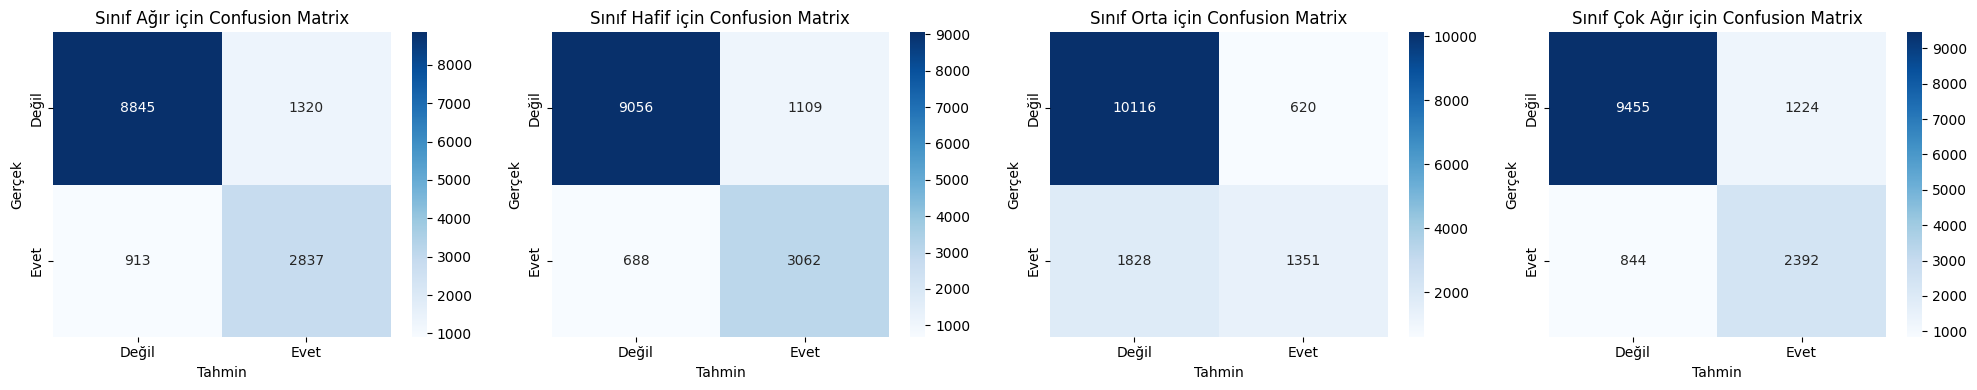

In [60]:
etiketler = np.unique(y_test16)

y_pred = best_modeller['Random Forest'].predict(X_test_16)

fig, axes = plt.subplots(1, len(etiketler), figsize=(5 * len(etiketler), 4))

for i, etiket in enumerate(etiketler):
    y_true_binary = (y_test16 == etiket).astype(int)
    y_pred_binary = (y_pred == etiket).astype(int)

    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Sınıf {etiket} için Confusion Matrix")
    axes[i].set_xlabel("Tahmin")
    axes[i].set_ylabel("Gerçek")
    axes[i].set_xticklabels(["Değil", "Evet"])
    axes[i].set_yticklabels(["Değil", "Evet"])

plt.tight_layout()
plt.show()